- 간단 코드 설명 : https://www.notion.so/ML-74535da7c1014427bd412e362a535354?pvs=4
- 최종 코드 설명
  

In [ ]:
!pip install chart_studio
!pip install cufflinks
!pip install plotly
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 52.4 MB/s eta 0:00:00


In [ ]:
import koreanize_matplotlib

In [ ]:
# default model
import pandas as pd
import numpy as np
import pandas as pd
import chart_studio as py
import cufflinks as cf
cf.go_offline(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 전처리

In [ ]:
# 데이터 전처리
c1_df = pd.read_csv('/content/c1.csv', encoding='euc-kr')
inf_df = pd.read_excel('/content/inf_relate.xlsx')
cr_df = pd.read_excel('/content/cr.xlsx')

In [ ]:
c1_df['Date'] = pd.to_datetime(c1_df['Date'], format='%Y/%m')
c1_df.set_index('Date', inplace=True)
cr_df['Date'] = pd.to_datetime(cr_df['Date'], format='%Y/%m')
cr_df.set_index('Date', inplace=True)

In [ ]:
# 인덱스 변경
inf_df.set_index('Date', inplace=True)
inf_df.index.name = 'Date'
inf_df.index = pd.to_datetime(inf_df.index)

In [ ]:
# 2007년 이후의 데이터만 선택
c1_df_temp = c1_df.copy()
inf_df_temp = inf_df.copy()
cr_df_temp = cr_df.copy()

c1_df = c1_df.loc['2007-12-01':]
inf_df = inf_df.loc['2007-12-01':]
cr_df = cr_df.loc['2007-12-01':]

In [ ]:
# 날짜(Date)를 기준으로 병합
merged_df = pd.merge(c1_df, inf_df[['Inflation_rate']], left_index=True, right_index=True, how='inner')

print(merged_df.head())

            Personal Finance Current  Personal Finance Expected  \
Date                                                              
2007-12-01                      98.0                      112.0   
2008-01-01                      98.0                      116.0   
2008-02-01                      94.0                      112.0   
2008-03-01                      93.0                      112.0   
2008-04-01                      86.0                      100.0   

            Business Condition 12 Months  Business Condition 5 Years  \
Date                                                                   
2007-12-01                          68.0                        81.0   
2008-01-01                          68.0                        88.0   
2008-02-01                          54.0                        83.0   
2008-03-01                          46.0                        81.0   
2008-04-01                          40.0                        71.0   

            Buying Condit

In [ ]:
merged_df.to_csv('merged_df.csv', index=True, encoding='euc-kr')

In [ ]:
merged_df = pd.read_csv('/content/merged_df.csv',encoding='euc-kr')

In [ ]:
merged_df.set_index('Date', inplace=True)
merged_df.head()

,Personal Finance Current,Personal Finance Expected,Business Condition 12 Months,Business Condition 5 Years,Buying Conditions,Current Index,Expected Index,CPI,GSCPI,WTI,...,기대인플레이션율,관리물가지수,생산자물가지수,공급물가지수,수입물가지수,수입물량지수,수입금액지수,순상품교역조건지수,소득교역조건지수,Inflation_rate
Date,,,,,,,,,,,,,,,,,,,,,
2007-12-01,98.0,112.0,68.0,81.0,137.0,91.0,65.6,211.445,-0.15,127.349998,...,3.0,93.229615,86.99,86.77,98.73,70.57,86.56,112.71,60.27,3.6
2008-01-01,98.0,116.0,68.0,88.0,146.0,94.4,68.1,212.174,-0.37,124.080002,...,3.2,92.970555,87.48,87.91,101.74,75.60,93.24,111.25,59.89,3.9
2008-02-01,94.0,112.0,54.0,83.0,123.0,83.8,62.4,212.687,0.45,115.459999,...,3.3,93.113425,88.29,89.44,104.50,67.39,84.45,110.11,55.28,3.6
2008-03-01,93.0,112.0,46.0,81.0,124.0,84.2,60.1,213.448,0.15,100.639999,...,3.5,94.002366,89.44,92.77,113.03,74.65,95.78,108.71,64.04,3.9
2008-04-01,86.0,100.0,40.0,71.0,112.0,77.0,53.3,213.942,0.13,67.809998,...,3.4,94.208742,91.34,95.53,117.32,73.41,98.08,106.96,63.28,4.1


In [ ]:
# 결측치 처리
merged_df = merged_df.fillna(method='ffill')
merged_df.isnull().sum().any()

False

In [ ]:
# CR 데이터 결측치
cr_df.isnull().sum().any()

False

In [ ]:
# 쉼표 제거
merged_df = merged_df.replace({',': ''}, regex=True).astype(float)

## CR 데이터 회귀 모형

In [ ]:
total_size = len(cr_df)

train_size = int(total_size * 0.7)

# 학습 데이터 (70%) - 회귀 모델
X_cr_train = cr_df.iloc[:train_size].drop(columns=['Inflation_rate', '소비자물가지수'])
y_cr_train = cr_df.iloc[:train_size]['Inflation_rate']

# 테스트 데이터 (30%) - 회귀 모델
X_cr_test = cr_df.iloc[train_size:].drop(columns=['Inflation_rate', '소비자물가지수'])
y_cr_test = cr_df.iloc[train_size:]['Inflation_rate']

from sklearn.preprocessing import StandardScaler
import numpy as np

# 기존 X_cr_train의 열 이름을 저장
original_feature_names = X_cr_train.columns

# 피처 스케일링
scaler_cr = StandardScaler()
X_cr_train = scaler_cr.fit_transform(X_cr_train)
X_cr_test = scaler_cr.transform(X_cr_test)

# 타겟 로그 변환
y_cr_train = np.log1p(y_cr_train)
y_cr_test = np.log1p(y_cr_test)

# X_cr_train의 인덱스를 y_cr_train과 동일하게 설정
X_cr_train = pd.DataFrame(X_cr_train, columns=original_feature_names)
X_cr_train.index = y_cr_train.index

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1. 선형 회귀 모델 학습
linear_cr_model = LinearRegression()
linear_cr_model.fit(X_cr_train, y_cr_train)

# 2. 테스트 데이터 예측
y_cr_pred = linear_cr_model.predict(X_cr_test)

# 성능 지표 계산
r2_cr = r2_score(y_cr_test, y_cr_pred)

# Adjusted R² 계산
n = len(y_cr_test)  # 테스트 데이터 샘플 수
p = X_cr_test.shape[1]  # 독립 변수 개수
adj_r2_cr = 1 - (1 - r2_cr) * ((n - 1) / (n - p - 1))

# MSE, RMSE, MAE 계산
mse_cr = mean_squared_error(y_cr_test, y_cr_pred)
rmse_cr = np.sqrt(mse_cr)
mae_cr = mean_absolute_error(y_cr_test, y_cr_pred)

# MDA 계산
actual_directions = np.sign(y_cr_test.diff().dropna())  # 실제 변화 방향
predicted_directions = np.sign(np.diff(y_cr_pred))     # 예측 변화 방향
common_index = actual_directions.index.intersection(y_cr_test.index[1:])  # 인덱스 동기화
mda_cr = (actual_directions.loc[common_index] == predicted_directions).mean()

# 성능 지표 결과를 딕셔너리로 저장
performance_metrics = {
    "R²": r2_cr,
    "Adjusted R²": adj_r2_cr,
    "RMSE": rmse_cr,
    "MAE": mae_cr,
    "MSE": mse_cr,
    "MDA": mda_cr
}

# 결과 출력
print("선형 회귀 모델 성능 지표:")
for metric, value in performance_metrics.items():
    print(f"{metric}: {value:.4f}")

# 성능 지표 딕셔너리 반환
performance_metrics

선형 회귀 모델 성능 지표:
R²: 0.3213
Adjusted R²: 0.1992
RMSE: 0.5111
MAE: 0.4598
MSE: 0.2612
MDA: 0.5254


{'R²': 0.32132391694118234,
 'Adjusted R²': 0.1991622219905952,
 'RMSE': 0.5110803527719494,
 'MAE': 0.45981510293530536,
 'MSE': 0.2612031269895002,
 'MDA': 0.5254237288135594}

In [ ]:
import statsmodels.api as sm
import pandas as pd

# 1. 학습 데이터에 상수항 추가
X_cr_train_sm = sm.add_constant(X_cr_train)

# 2. OLS 모델 학습
ols_cr_model = sm.OLS(y_cr_train, X_cr_train_sm).fit()

# 3. 모델 요약 정보 출력
print(ols_cr_model.summary())

                            OLS Regression Results                            
Dep. Variable:         Inflation_rate   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     38.79
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           1.08e-32
Time:                        10:35:06   Log-Likelihood:                 17.804
No. Observations:                 140   AIC:                            -15.61
Df Residuals:                     130   BIC:                             13.81
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0581      0.019     56.618   

# 목표 변수 = 당월 인플레이션
## 회귀 모델 학습을 위해 그레인저 검정

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# 시차 생성 (최대 6개의 시차)
max_lag = 6
variables = merged_df.columns.difference(['Inflation_rate'])

# 각 변수에 대해 그레인저 인과 검정을 수행하여 최적 시차를 찾기
results = {}
p_results = []
for var in variables:
    # Granger 인과관계 검정 수행 (verbose=False로 출력을 최소화)
    test_result = grangercausalitytests(merged_df[['Inflation_rate', var]], max_lag, verbose=False)

    # 각 시차의 p-value를 저장
    lag_p_values = [(lag, test[0]['ssr_ftest'][1]) for lag, test in test_result.items()]

    # p-value가 가장 작은 시차 선택
    optimal_lag = min(lag_p_values, key=lambda x: x[1])[0]
    results[var] = (optimal_lag, lag_p_values)

# p-value가 0.05 이하인 결과만 필터링하여 출력
for var, (lag, p_values) in results.items():
    # p-value가 0.05 이하인 시차들만 선택
    significant_lags = [(lag, p_val) for lag, p_val in p_values if p_val <= 0.05]
    if significant_lags:
        p_results.append(var)
        print(f"{var}: Optimal Lag - {lag}") #lag(s), Significant Lags (p <= 0.05) - {significant_lags}")

Business Condition 12 Months: Optimal Lag - 2
Business Condition 5 Years: Optimal Lag - 4
CPI: Optimal Lag - 4
Expected Index: Optimal Lag - 6
GSCPI: Optimal Lag - 1
KOSPI: Optimal Lag - 1
a_atpi: Optimal Lag - 4
a_htpi: Optimal Lag - 4
a_rpi: Optimal Lag - 4
경기종합지수(동행지수순환변동치): Optimal Lag - 6
경제심리지수: Optimal Lag - 1
공급물가지수: Optimal Lag - 4
국고채10년 차분: Optimal Lag - 1
기대인플레이션율: Optimal Lag - 1
생산자물가지수: Optimal Lag - 2
수입물가지수: Optimal Lag - 4
원/미국달러(매매기준율) 말일: Optimal Lag - 1
원/미국달러(매매기준율) 평균: Optimal Lag - 1
회사채(3년, AA-): Optimal Lag - 2


In [ ]:
merged_shift = merged_df.copy()

In [ ]:
for var, optimal_lag in results.items():
    # p_result에 포함된 변수명만 대상으로
    if var in p_results and var in merged_df.columns:
        # 최적 시차가 0보다 클 경우에만 shift() 적용
        if optimal_lag[0] > 0:
            merged_shift[f'{var}'] = merged_df[var].shift(optimal_lag[0])

In [ ]:
print(merged_shift.index)
print(inf_df.index)

Index(['2007-12-01', '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
       '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01', '2008-09-01',
       ...
       '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
       '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01'],
      dtype='object', name='Date', length=202)
DatetimeIndex(['2007-12-01', '2008-01-01', '2008-02-01', '2008-03-01',
               '2008-04-01', '2008-05-01', '2008-06-01', '2008-07-01',
               '2008-08-01', '2008-09-01',
               ...
               '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01'],
              dtype='datetime64[ns]', name='Date', length=203, freq=None)


### 기존 코드 인덱스 불일치 오류
[241117 업데이트] 기존 코드에 인덱스 데이터 타입 불일치로 데이터 프레임이 날라가는 문제를 방지하기 위해 코드를 추가하였습니다.

In [ ]:
# 공통 인덱스
common_index = merged_shift.index.intersection(inf_df.index)
print(len(common_index))
print(common_index)

0
Index([], dtype='object', name='Date')


In [ ]:
# 인덱스 타입 확인
print("merged_shift index type:", type(merged_shift.index[0]))
print("inf_df index type:", type(inf_df.index[0]))

merged_shift index type: <class 'str'>
inf_df index type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
# 타입 변환
merged_shift.index = pd.to_datetime(merged_shift.index)

In [ ]:
print(type(merged_shift.index[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
common_variables = [var for var in p_results if var in merged_df.columns]

# 겹치는 변수들만 새로운 데이터프레임에 저장
merged_shift = merged_shift[common_variables]
merged_shift = pd.merge(
    merged_shift,
    inf_df[['Inflation_rate']],
    left_index=True,
    right_index=True,
    how='inner'
)

# 결과 확인
merged_shift.head(5)

,Business Condition 12 Months,Business Condition 5 Years,CPI,Expected Index,GSCPI,KOSPI,a_atpi,a_htpi,a_rpi,경기종합지수(동행지수순환변동치),경제심리지수,공급물가지수,국고채10년 차분,기대인플레이션율,생산자물가지수,수입물가지수,원/미국달러(매매기준율) 말일,원/미국달러(매매기준율) 평균,"회사채(3년, AA-)",Inflation_rate
Date,,,,,,,,,,,,,,,,,,,,
2007-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6
2008-01-01,NaN,NaN,NaN,NaN,-0.15,1897.13,NaN,NaN,NaN,NaN,111.8,NaN,0.21,3.0,NaN,NaN,938.2,930.24,NaN,3.9
2008-02-01,68.0,NaN,NaN,NaN,-0.37,1624.68,NaN,NaN,NaN,NaN,111.8,NaN,-0.26,3.2,86.99,NaN,943.9,942.39,6.73,3.6
2008-03-01,68.0,NaN,NaN,NaN,0.45,1711.62,NaN,NaN,NaN,NaN,114.2,NaN,-0.28,3.3,87.48,NaN,937.3,944.69,6.64,3.9
2008-04-01,54.0,81.0,211.445,NaN,0.15,1703.99,69.0,72.8,74.1,NaN,106.9,86.77,0.08,3.5,88.29,98.73,991.7,979.86,6.27,4.1


In [ ]:
merged_shift = merged_shift.fillna(method='bfill')
#merged_shift.dropna(inplace=True)
merged_shift.isnull().sum().any()

False

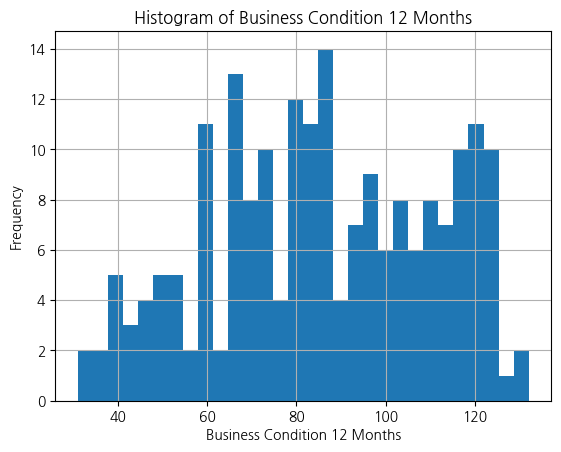

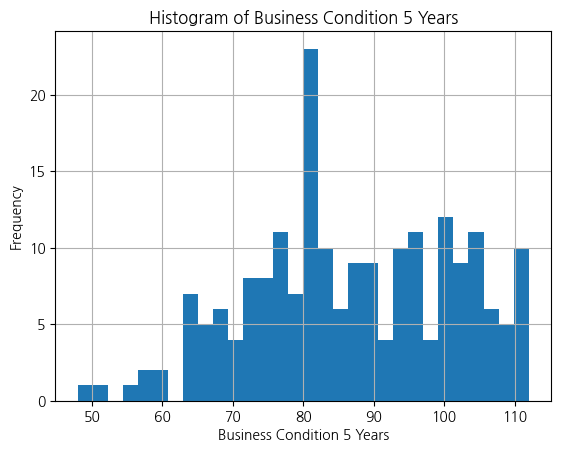

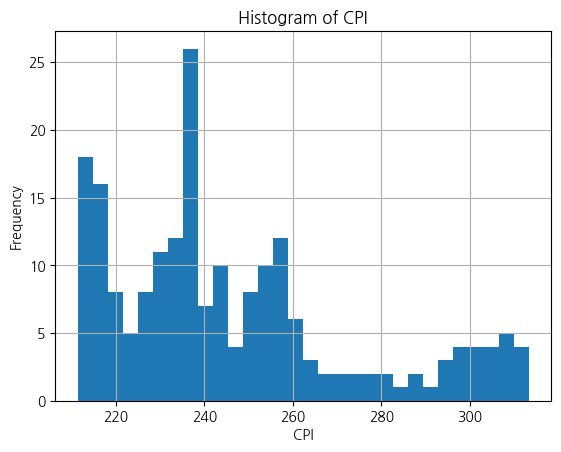

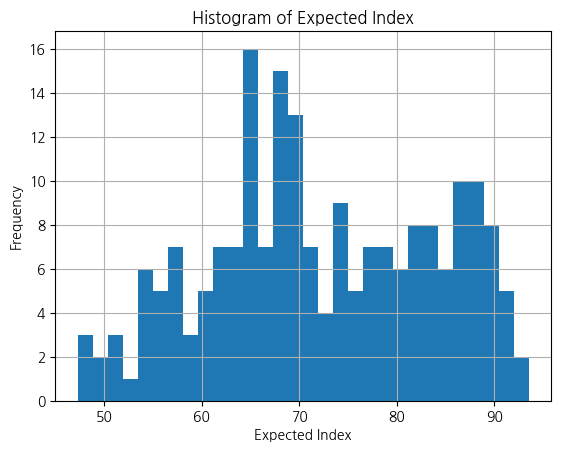

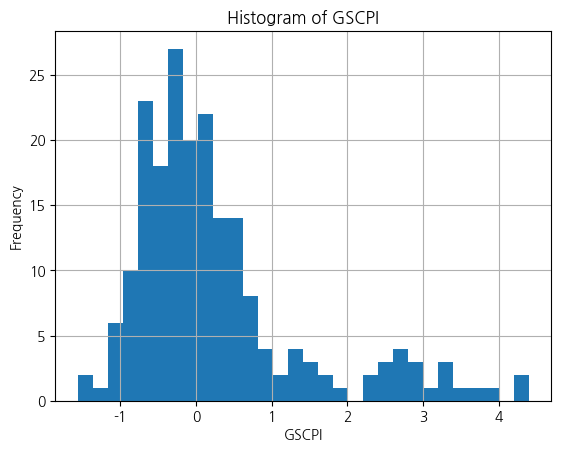

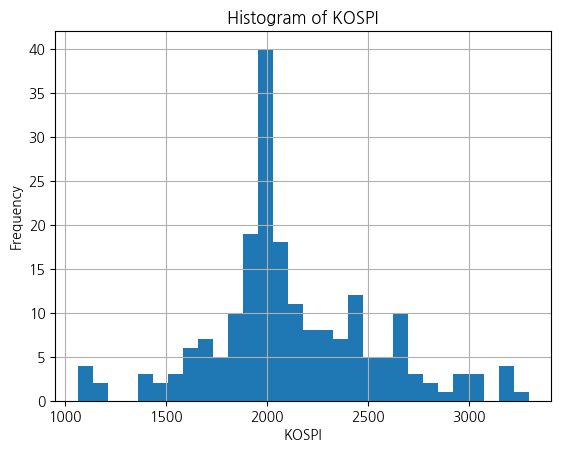

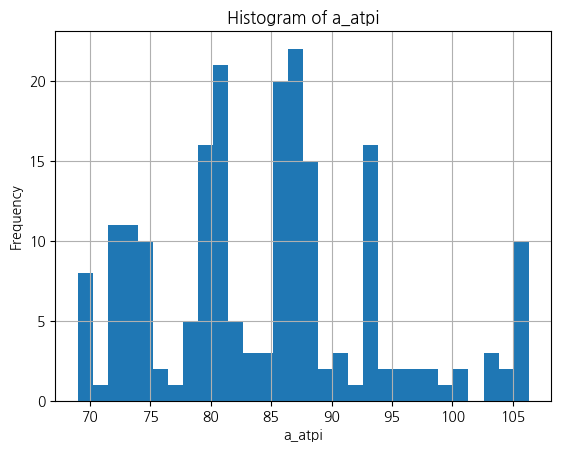

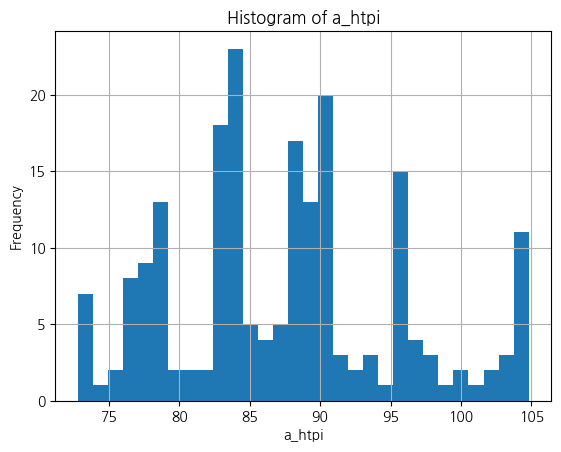

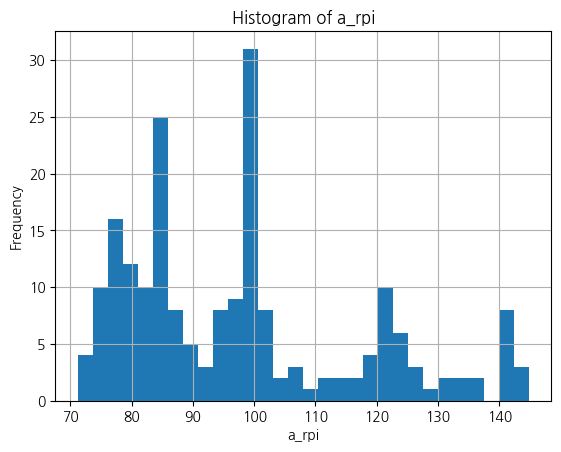

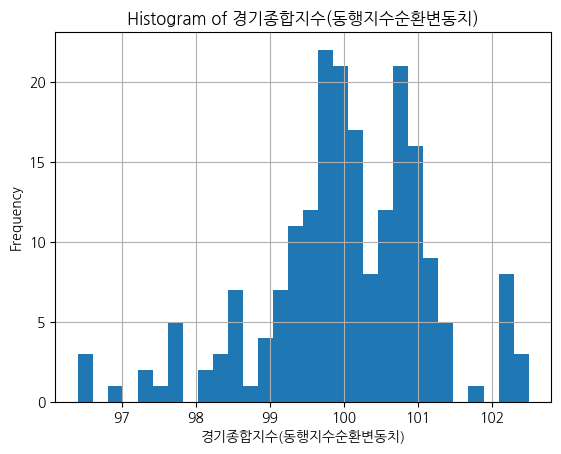

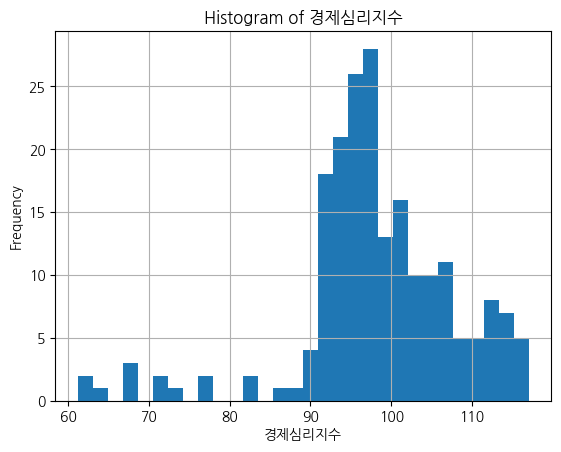

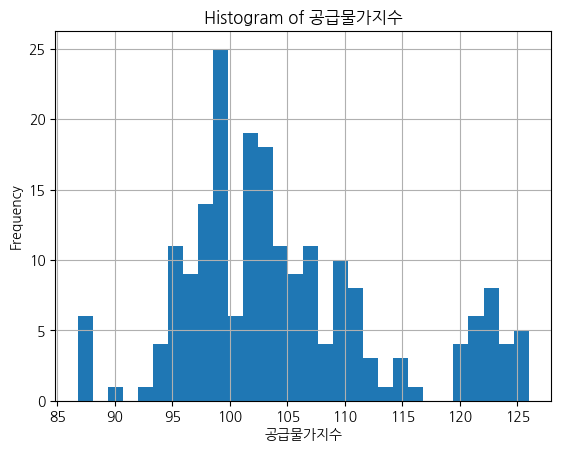

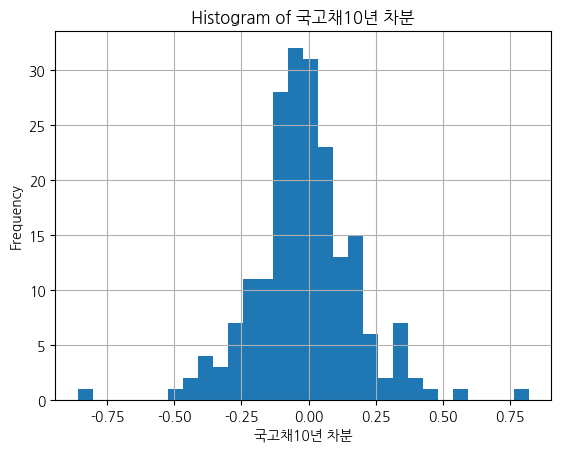

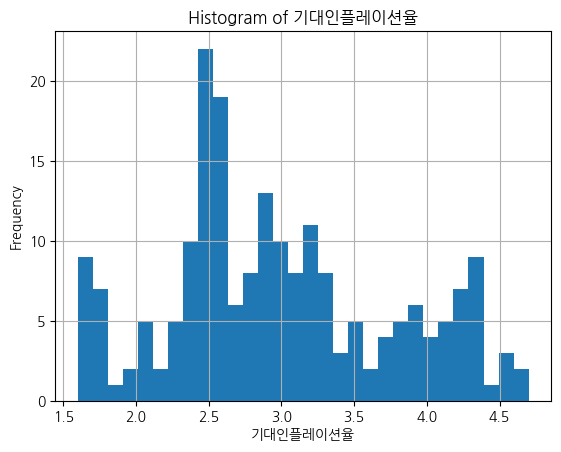

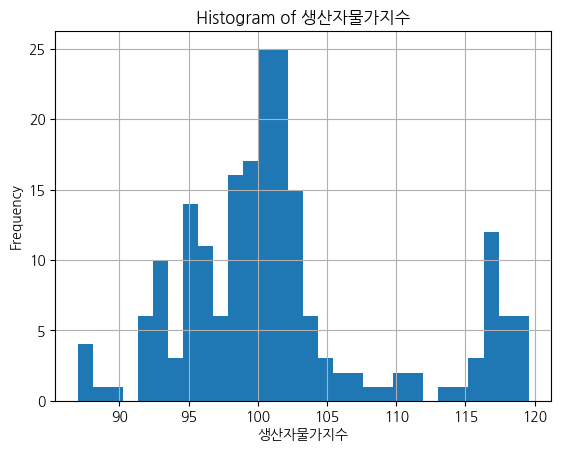

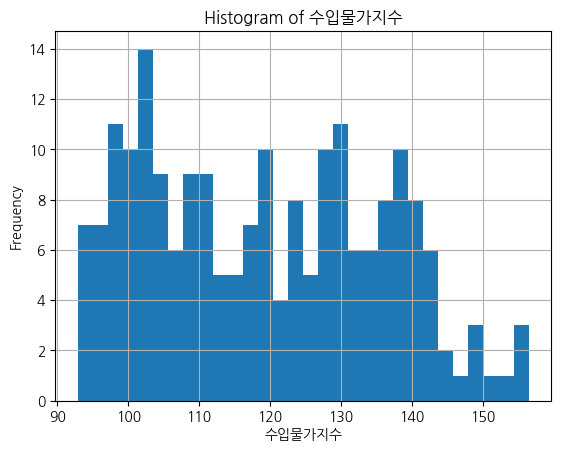

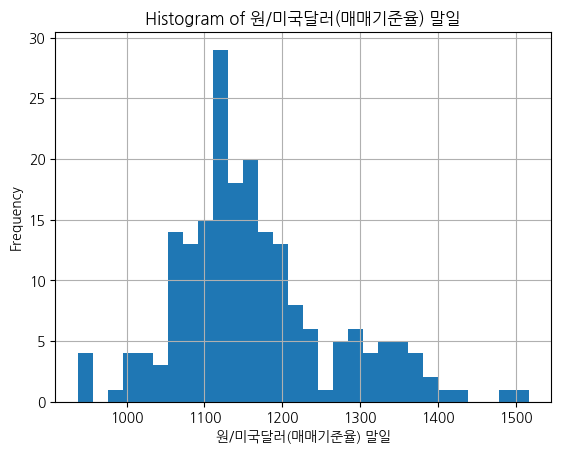

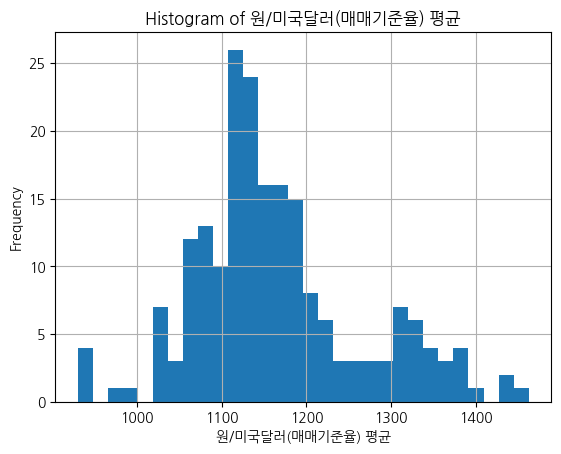

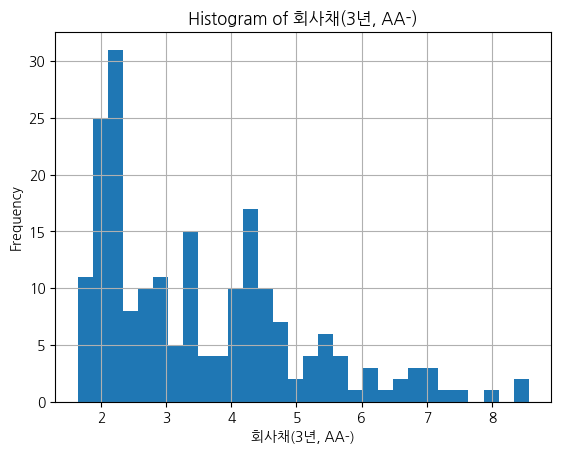

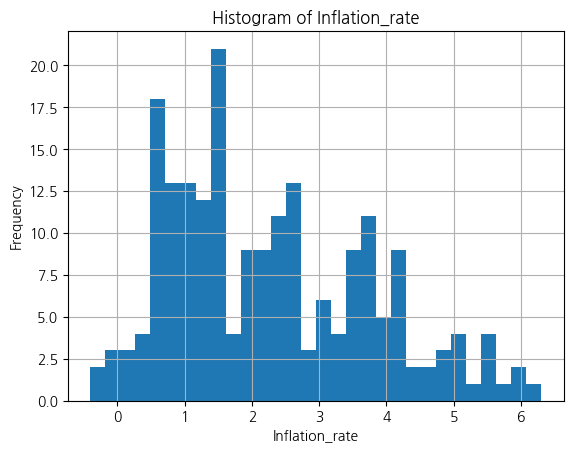

In [ ]:
for column in merged_shift.columns:
    plt.figure()
    merged_shift[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
total_size = len(merged_shift)

train_size = int(total_size * 0.7)

# 학습 데이터 (70%) - 회귀 모델
X_reg_train = merged_shift.iloc[:train_size].drop(columns=['Inflation_rate'])
y_train = merged_shift.iloc[:train_size]['Inflation_rate']

# 테스트 데이터 (30%) - 회귀 모델
X_reg_test = merged_shift.iloc[train_size:].drop(columns=['Inflation_rate'])
y_test = merged_shift.iloc[train_size:]['Inflation_rate']

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 기존 X_reg_train의 열 이름을 저장
original_feature_names = X_reg_train.columns

# 피처 스케일링
scaler_X = StandardScaler()
X_reg_train = scaler_X.fit_transform(X_reg_train)
X_reg_test = scaler_X.transform(X_reg_test)

# 타겟 로그 변환
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

### BackWard Selection

In [ ]:
# X_reg_train의 인덱스를 y_train과 동일하게 설정
X_reg_train = pd.DataFrame(X_reg_train, columns=original_feature_names)
X_reg_train.index = y_train.index

In [ ]:
# X_reg_train의 인덱스를 y_train과 동일하게 설정
X_reg_train = pd.DataFrame(X_reg_train, columns=original_feature_names)
X_reg_train.index = y_train.index

import statsmodels.api as sm
import numpy as np

def backward_selection(X, y, significance_level=0.05):
    """
    Perform backward selection to find the optimal set of features.
    """
    X = sm.add_constant(X)  # 상수항 추가
    selected_features = list(range(X.shape[1]))  # 초기에는 모든 열의 인덱스를 포함
    feature_names = X.columns.tolist()  # 열 이름 저장

    while len(selected_features) > 1:
        # OLS 모델 적합
        model = sm.OLS(y, X.iloc[:, selected_features]).fit()

        # 각 변수의 p-value 계산
        p_values = model.pvalues.iloc[1:]  # 상수항(const) 제외
        max_p_value = p_values.max()

        # 최대 p-value가 유의 수준을 초과하면 해당 변수 제거
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()  # 열 이름 반환
            excluded_index = feature_names.index(excluded_feature)  # 이름을 인덱스로 변환
            selected_features.remove(excluded_index)
        else:
            break

    # 최종 선택된 열 이름 반환
    selected_feature_names = [feature_names[i] for i in selected_features if i != 0]  # 상수항 제외
    return selected_feature_names, selected_features, model

In [ ]:
print(np.isnan(X_reg_train).sum())  # 스케일링 후 NaN 확인
print(np.isinf(X_reg_train).sum())  # 스케일링 후 Inf 확인

Business Condition 12 Months    0
Business Condition 5 Years      0
CPI                             0
Expected Index                  0
GSCPI                           0
KOSPI                           0
a_atpi                          0
a_htpi                          0
a_rpi                           0
경기종합지수(동행지수순환변동치)               0
경제심리지수                          0
공급물가지수                          0
국고채10년 차분                       0
기대인플레이션율                        0
생산자물가지수                         0
수입물가지수                          0
원/미국달러(매매기준율) 말일                0
원/미국달러(매매기준율) 평균                0
회사채(3년, AA-)                    0
dtype: int64
Business Condition 12 Months    0
Business Condition 5 Years      0
CPI                             0
Expected Index                  0
GSCPI                           0
KOSPI                           0
a_atpi                          0
a_htpi                          0
a_rpi                           0
경기종합지수(동행지수순환변동치)               0
경

In [ ]:
# Backward Selection 수행
X_reg_train = pd.DataFrame(X_reg_train, columns=original_feature_names)  # 다시 DataFrame으로 변환
X_reg_train.index = y_train.index  # 인덱스 동기화

selected_features_names, selected_features_indices, backward_model = backward_selection(X=X_reg_train, y=y_train)

# 결과 출력
print("Backward Selection - 선택된 변수:", selected_features_names)

Backward Selection - 선택된 변수: ['Business Condition 12 Months', 'CPI', 'GSCPI', 'a_htpi', 'a_rpi', '경기종합지수(동행지수순환변동치)', '경제심리지수', '생산자물가지수', '원/미국달러(매매기준율) 평균', '회사채(3년, AA-)']


In [ ]:
len(selected_features_names)

10

### Best Subset

In [ ]:
from itertools import combinations
import statsmodels.api as sm

def best_subset_selection_aic(X, y):
    """
    Perform best subset selection based on AIC criterion.
    """
    X = sm.add_constant(X)  # 상수항 추가
    n_features = X.shape[1] - 1  # 상수항 제외한 변수 개수
    best_aic = float('inf')  # 초기 AIC 값 (무한대로 설정)
    best_model = None
    best_subset = None

    # 모든 가능한 변수 조합 탐색
    for k in range(1, n_features + 1):
        for subset in combinations(range(1, X.shape[1]), k):  # 상수항 제외
            subset = list(subset)
            subset_with_const = [0] + subset  # 상수항 포함
            model = sm.OLS(y, X.iloc[:, subset_with_const]).fit()
            aic = model.aic  # AIC 계산

            if aic < best_aic:  # AIC가 더 낮은 경우 갱신
                best_aic = aic
                best_model = model
                best_subset = subset_with_const

    return best_subset, best_model, best_aic

In [ ]:
# Best Subset Selection 수행
best_subset_aic, best_subset_model_aic, best_aic_value = best_subset_selection_aic(X_reg_train, y_train)

# 선택된 변수 출력
selected_features_aic = [original_feature_names[i - 1] for i in best_subset_aic[1:]]  # 상수항 제외
print("AIC 기준 Best Subset Selection - 선택된 변수:", selected_features_aic)
print("최적 AIC 값:", best_aic_value)

AIC 기준 Best Subset Selection - 선택된 변수: ['Business Condition 12 Months', 'CPI', 'GSCPI', 'KOSPI', 'a_htpi', 'a_rpi', '경기종합지수(동행지수순환변동치)', '경제심리지수', '공급물가지수', '생산자물가지수', '수입물가지수', '원/미국달러(매매기준율) 평균', '회사채(3년, AA-)']
최적 AIC 값: -95.62954086150972


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test, selected_features):
    """
    Evaluate the model on test data and calculate various metrics.
    """
    # 테스트 데이터에서 선택된 변수만 사용
    X_test_selected = sm.add_constant(X_test[selected_features])

    # 예측값 계산
    y_pred = model.predict(X_test_selected)

    # 성능 지표 계산
    r2_b = r2_score(y_test, y_pred)
    adj_r2_b = 1 - (1 - r2_b) * ((len(y_test) - 1) / (len(y_test) - len(selected_features) - 1))
    mse_b = mean_squared_error(y_test, y_pred)
    rmse_b = np.sqrt(mse_b)  # mse_b를 사용하여 계산
    mae_b = mean_absolute_error(y_test, y_pred)

    # MDA 계산
    actual_directions = np.sign(y_test.diff().dropna())  # 실제 변화 방향
    predicted_directions = np.sign(np.diff(y_pred))     # 예측 변화 방향
    common_index = actual_directions.index.intersection(y_test.index[1:])  # 인덱스 동기화
    mda_b = (actual_directions.loc[common_index] == predicted_directions).mean()

    # 결과 반환
    return {"R²": r2_b, "Adjusted R²": adj_r2_b, "RMSE": rmse_b, "MAE": mae_b, "MSE": mse_b, "MDA": mda_b}

In [ ]:
# Backward Selection 테스트 데이터 준비
X_reg_test_df = pd.DataFrame(X_reg_test, columns=original_feature_names)
X_reg_test_df.index = y_test.index  # 인덱스 동기화

# Backward Selection 성능 평가
backward_metrics = evaluate_model(backward_model, X_reg_test_df, y_test, selected_features_names)

print("Backward Selection 성능 평가:")
for metric, value in backward_metrics.items():
    print(f"{metric}: {value:.4f}")

Backward Selection 성능 평가:
R²: 0.1629
Adjusted R²: -0.0046
RMSE: 0.5471
MAE: 0.4729
MSE: 0.2993
MDA: 0.5500


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test, selected_features):
    """
    Evaluate the model on test data and calculate various metrics.
    """
    # 테스트 데이터에서 선택된 변수만 사용
    X_test_selected = sm.add_constant(X_test[selected_features])

    # 예측값 계산
    y_pred = model.predict(X_test_selected)

    # 성능 지표 계산
    r2_b = r2_score(y_test, y_pred)
    adj_r2_b = 1 - (1 - r2_b) * ((len(y_test) - 1) / (len(y_test) - len(selected_features) - 1))
    mse_b = mean_squared_error(y_test, y_pred)
    rmse_b = np.sqrt(mse_b)  # mse_b를 사용하여 계산
    mae_b = mean_absolute_error(y_test, y_pred)

    # MDA 계산
    actual_directions = np.sign(y_test.diff().dropna())  # 실제 변화 방향
    predicted_directions = np.sign(np.diff(y_pred))     # 예측 변화 방향
    common_index = actual_directions.index.intersection(y_test.index[1:])  # 인덱스 동기화
    mda_b = (actual_directions.loc[common_index] == predicted_directions).mean()

    # 결과 반환
    return mse_b, rmse_b, mae_b, r2_b, adj_r2_b, mda_b

# Backward Selection 테스트 데이터 준비
X_reg_test_df = pd.DataFrame(X_reg_test, columns=original_feature_names)
X_reg_test_df.index = y_test.index  # 인덱스 동기화

# Backward Selection 성능 평가
mse_b, rmse_b, mae_b, r2_b, adj_r2_b, mda_b = evaluate_model(
    backward_model, X_reg_test_df, y_test, selected_features_names
)

# 결과 출력
print("Backward Selection 성능 평가:")
print(f"MSE_b: {mse_b:.4f}")
print(f"RMSE_b: {rmse_b:.4f}")
print(f"MAE_b: {mae_b:.4f}")
print(f"R²_b: {r2_b:.4f}")
print(f"Adjusted R²_b: {adj_r2_b:.4f}")
print(f"MDA_b: {mda_b:.4f}")

Backward Selection 성능 평가:
MSE_b: 0.2993
RMSE_b: 0.5471
MAE_b: 0.4729
R²_b: 0.1629
Adjusted R²_b: -0.0046
MDA_b: 0.5500


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import statsmodels.api as sm

def evaluate_model_aic_bss(model, X_test, y_test, selected_features):
    """
    Evaluate the model on test data and calculate R², Adjusted R², RMSE, MAE, MSE, and MDA.
    """
    # 테스트 데이터에서 선택된 변수만 사용
    X_test_selected = sm.add_constant(X_test[selected_features])

    # 예측값 계산
    y_pred = model.predict(X_test_selected)

    # 성능 지표 계산
    r2_bss = r2_score(y_test, y_pred)
    n = len(y_test)  # 샘플 수
    p = len(selected_features)  # 독립 변수 개수
    adj_r2_bss = 1 - (1 - r2_bss) * ((n - 1) / (n - p - 1))  # Adjusted R² 계산
    mse_bss = mean_squared_error(y_test, y_pred)
    rmse_bss = np.sqrt(mse_bss)
    mae_bss = mean_absolute_error(y_test, y_pred)

    # MDA 계산
    actual_directions = np.sign(y_test.diff().dropna())  # 실제 변화 방향
    predicted_directions = np.sign(np.diff(y_pred))     # 예측 변화 방향
    common_index = actual_directions.index.intersection(y_test.index[1:])  # 인덱스 동기화
    mda_bss = (actual_directions.loc[common_index] == predicted_directions).mean()

    # 결과 반환
    return {
        "R²_bss": r2_bss,
        "Adjusted R²_bss": adj_r2_bss,
        "RMSE_bss": rmse_bss,
        "MAE_bss": mae_bss,
        "MSE_bss": mse_bss,
        "MDA_bss": mda_bss
    }

# 테스트 데이터 준비
X_reg_test_df = pd.DataFrame(X_reg_test, columns=original_feature_names)
X_reg_test_df.index = y_test.index  # 인덱스 동기화

# 선택된 변수 기반 성능 평가
metrics_bss = evaluate_model_aic_bss(best_subset_model_aic, X_reg_test_df, y_test, selected_features_aic)

# 결과 출력
print("Best Subset Selection 기반 모델의 성능 평가:")
for metric, value in metrics_bss.items():
    print(f"{metric}: {value:.4f}")

Best Subset Selection 기반 모델의 성능 평가:
R²_bss: 0.1769
Adjusted R²_bss: -0.0508
RMSE_bss: 0.5425
MAE_bss: 0.4776
MSE_bss: 0.2943
MDA_bss: 0.6000


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import statsmodels.api as sm

def evaluate_model_aic_bss(model, X_test, y_test, selected_features):
    """
    Evaluate the model on test data and calculate R², Adjusted R², RMSE, MAE, MSE, and MDA.
    """
    # 테스트 데이터에서 선택된 변수만 사용
    X_test_selected = sm.add_constant(X_test[selected_features])

    # 예측값 계산
    y_pred = model.predict(X_test_selected)

    # 성능 지표 계산
    r2_bss = r2_score(y_test, y_pred)
    n = len(y_test)  # 샘플 수
    p = len(selected_features)  # 독립 변수 개수
    adj_r2_bss = 1 - (1 - r2_bss) * ((n - 1) / (n - p - 1))  # Adjusted R² 계산
    mse_bss = mean_squared_error(y_test, y_pred)
    rmse_bss = np.sqrt(mse_bss)
    mae_bss = mean_absolute_error(y_test, y_pred)

    # MDA 계산
    actual_directions = np.sign(y_test.diff().dropna())  # 실제 변화 방향
    predicted_directions = np.sign(np.diff(y_pred))     # 예측 변화 방향
    common_index = actual_directions.index.intersection(y_test.index[1:])  # 인덱스 동기화
    mda_bss = (actual_directions.loc[common_index] == predicted_directions).mean()

    # 변수로 반환
    return mse_bss, rmse_bss, mae_bss, r2_bss, adj_r2_bss, mda_bss

# 테스트 데이터 준비
X_reg_test_df = pd.DataFrame(X_reg_test, columns=original_feature_names)
X_reg_test_df.index = y_test.index  # 인덱스 동기화

# 선택된 변수 기반 성능 평가
mse_bss, rmse_bss, mae_bss, r2_bss, adj_r2_bss, mda_bss = evaluate_model_aic_bss(
    best_subset_model_aic, X_reg_test_df, y_test, selected_features_aic
)

# 결과 출력
print("Best Subset Selection 기반 모델의 성능 평가:")
print(f"MSE_bss: {mse_bss:.4f}")
print(f"RMSE_bss: {rmse_bss:.4f}")
print(f"MAE_bss: {mae_bss:.4f}")
print(f"R²_bss: {r2_bss:.4f}")
print(f"Adjusted R²_bss: {adj_r2_bss:.4f}")
print(f"MDA_bss: {mda_bss:.4f}")

Best Subset Selection 기반 모델의 성능 평가:
MSE_bss: 0.2943
RMSE_bss: 0.5425
MAE_bss: 0.4776
R²_bss: 0.1769
Adjusted R²_bss: -0.0508
MDA_bss: 0.6000


### VIF 다중공산성

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calculate_vif(X):
    """
    Calculate VIF for all features in the dataset.
    """
    X = sm.add_constant(X)  # 상수항 추가
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Backward Selection 모형의 VIF 계산
vif_backward = calculate_vif(X_reg_train[selected_features_names])
print("Backward Selection 모형의 VIF:")
print(vif_backward)

# Best Subset Selection 모형의 VIF 계산
vif_best_subset = calculate_vif(X_reg_train[selected_features_aic])
print("\nBest Subset Selection 모형의 VIF:")
print(vif_best_subset)

Backward Selection 모형의 VIF:
                         Feature        VIF
0                          const   1.000000
1   Business Condition 12 Months   5.381514
2                            CPI  34.608399
3                          GSCPI   1.560437
4                         a_htpi  75.961528
5                          a_rpi  45.781975
6              경기종합지수(동행지수순환변동치)   3.128612
7                         경제심리지수   3.222452
8                        생산자물가지수   4.516330
9               원/미국달러(매매기준율) 평균   4.623935
10                  회사채(3년, AA-)  10.854126

Best Subset Selection 모형의 VIF:
                         Feature        VIF
0                          const   1.000000
1   Business Condition 12 Months   5.727965
2                            CPI  37.317867
3                          GSCPI   2.055308
4                          KOSPI  10.271031
5                         a_htpi  92.680250
6                          a_rpi  58.959729
7              경기종합지수(동행지수순환변동치)   3.323233
8               

(1) 정규성 검정

In [ ]:
from scipy.stats import shapiro

def check_normality(residuals):
    """
    Perform Shapiro-Wilk Test for normality of residuals.
    """
    stat, p_value = shapiro(residuals)
    return {"Statistic": stat, "p-value": p_value}

# Backward Selection 잔차의 정규성 검정
residuals_backward = backward_model.resid
normality_backward = check_normality(residuals_backward)
print("\nBackward Selection 오차항 정규성 검정 (Shapiro-Wilk):")
print(normality_backward)

# Best Subset Selection 잔차의 정규성 검정
residuals_best_subset = best_subset_model_aic.resid
normality_best_subset = check_normality(residuals_best_subset)
print("\nBest Subset Selection 오차항 정규성 검정 (Shapiro-Wilk):")
print(normality_best_subset)

# 둘다 정규성 검정은 ok


Backward Selection 오차항 정규성 검정 (Shapiro-Wilk):
{'Statistic': 0.9920699108240595, 'p-value': 0.6184379055861049}

Best Subset Selection 오차항 정규성 검정 (Shapiro-Wilk):
{'Statistic': 0.9917956442543041, 'p-value': 0.5888348286833777}


(2) 독립성 검정

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Backward Selection 잔차의 독립성 검정
dw_backward = durbin_watson(residuals_backward)
print("\nBackward Selection 오차항 독립성 검정 (Durbin-Watson):", dw_backward)

# Best Subset Selection 잔차의 독립성 검정
dw_best_subset = durbin_watson(residuals_best_subset)
print("\nBest Subset Selection 오차항 독립성 검정 (Durbin-Watson):", dw_best_subset)

# 2에 가까우면 자기상관없음.
# 0에 가까우면 양의자기상관, 4에 가까우면 음의 자기상관

# 0 에 가까워 양의 자기상관 있음을 알 수 있음.


Backward Selection 오차항 독립성 검정 (Durbin-Watson): 0.7041249707487075

Best Subset Selection 오차항 독립성 검정 (Durbin-Watson): 0.7639462474722004


(3) 등분산성 검정

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

def check_homoscedasticity(residuals, X):
    """
    Perform Breusch-Pagan Test for homoscedasticity.
    """
    lm_stat, lm_pval, f_stat, f_pval = het_breuschpagan(residuals, sm.add_constant(X))
    return {"LM Statistic": lm_stat, "LM p-value": lm_pval, "F Statistic": f_stat, "F p-value": f_pval}

# Backward Selection 잔차의 등분산성 검정
homoscedasticity_backward = check_homoscedasticity(residuals_backward, X_reg_train[selected_features_names])
print("\nBackward Selection 오차항 등분산성 검정 (Breusch-Pagan):")
print(homoscedasticity_backward)

# Best Subset Selection 잔차의 등분산성 검정
homoscedasticity_best_subset = check_homoscedasticity(residuals_best_subset, X_reg_train[selected_features_aic])
print("\nBest Subset Selection 오차항 등분산성 검정 (Breusch-Pagan):")
print(homoscedasticity_best_subset)

# 둘다 이분산성 가진다.


Backward Selection 오차항 등분산성 검정 (Breusch-Pagan):
{'LM Statistic': 37.98032510474681, 'LM p-value': 3.825216286099292e-05, 'F Statistic': 4.792717768365417, 'F p-value': 7.4607398768103266e-06}

Best Subset Selection 오차항 등분산성 검정 (Breusch-Pagan):
{'LM Statistic': 39.766391539521905, 'LM p-value': 0.00015072423643200088, 'F Statistic': 3.8375304576922393, 'F p-value': 3.269927152188822e-05}


(4) 자기상관 검정

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Backward Selection 모델의 Ljung-Box Test
ljung_box_backward = acorr_ljungbox(backward_model.resid, lags=[10], return_df=True)
print("\nBackward Selection 오차항 Ljung-Box Test 결과:")
print(f"Statistic: {ljung_box_backward['lb_stat'].values[0]}")
print(f"p-value: {ljung_box_backward['lb_pvalue'].values[0]}")

# Best Subset Selection 모델의 Ljung-Box Test
ljung_box_best_subset = acorr_ljungbox(best_subset_model_aic.resid, lags=[10], return_df=True)
print("\nBest Subset Selection 오차항 Ljung-Box Test 결과:")
print(f"Statistic: {ljung_box_best_subset['lb_stat'].values[0]}")
print(f"p-value: {ljung_box_best_subset['lb_pvalue'].values[0]}")

#둘다 자기상관 있다.


Backward Selection 오차항 Ljung-Box Test 결과:
Statistic: 90.3964171688339
p-value: 4.469016042644225e-15

Best Subset Selection 오차항 Ljung-Box Test 결과:
Statistic: 85.81069975847714
p-value: 3.611548613891355e-14


✨ **[1117 업데이트] 모델 학습 업데이트 (제일 중요한 수정 부분)**

- 기존 코드는 k-fold의 난수가 고정되어 있지 않아, 학습 시킬 때마다 매번 다른 값을 도출해내서, 일관된 결과를 얻지 못해 디버깅 과정에서의 혼란이 있었는데, 이 부분을 수정하였습니다.
- 난수 고정을 통해 동일한 입력에서 항상 동일한 출력을 얻도록 재현할 수 있는 환경을 만들도록 했습니다!

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# 하이퍼파라미터 설정
hyperparams = {
    'max_iter': [1000, 1500, 2000, 2500, 3000],
    'alpha':  [0.001, 0.01, 0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

lasso_grid = GridSearchCV(
    estimator=Lasso(),
    param_grid=hyperparams,
    verbose=True,
    scoring='neg_root_mean_squared_error',
    cv=kfold,
    # 여기서 객체로 Kfold를 넣어준 것입니다.
    # 원래 내부적으로 KFold가 사용되는데, 이걸 정수로 두면 randomstate를 고정할 수 없어서
    # 성능이 동일하지 않습니다.
    n_jobs=-1
)

lasso_grid.fit(X_reg_train, y_train)
lasso_model = lasso_grid.best_estimator_

print("Best parameters:", lasso_grid.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters: {'alpha': 0.001, 'max_iter': 1000}


In [ ]:
print("Best score:", lasso_grid.best_score_)

Best score: -0.17578061776308987


In [ ]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
# 테스트 세트에서 성능 평가
y_pred_lasso = lasso_model.predict(X_reg_test)

mse_value_ls = mean_squared_error(y_test, y_pred_lasso)
rmse_value_ls = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_value_ls = mean_absolute_error(y_test, y_pred_lasso)
r2_value_ls = r2_score(y_test, y_pred_lasso)

print("Test set MSE:", mse_value_ls)
print("Test set RMSE:", rmse_value_ls)
print("Test set MAE:", mae_value_ls)
print("Test set R²:", r2_value_ls)

Test set MSE: 0.1804470627887418
Test set RMSE: 0.424790610523281
Test set MAE: 0.36437082981957736
Test set R²: 0.49531353633299224


In [ ]:
mse_value_ls = mean_squared_error(y_test, y_pred_lasso)
rmse_value_ls = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_value_ls = mean_absolute_error(y_test, y_pred_lasso)
r2_value_ls = r2_score(y_test, y_pred_lasso)

def mean_directional_accuracy(y_true, y_pred):
    y_true_direction = np.sign(np.diff(y_true))
    y_pred_direction = np.sign(np.diff(y_pred))

    correct_directions = np.sum(y_true_direction == y_pred_direction)
    mda = correct_directions / len(y_true_direction)
    return mda

# MDA 계산
mda_value_ls = mean_directional_accuracy(y_test, y_pred_lasso)

print("Test set MSE:", mse_value_ls)
print("Test set RMSE:", rmse_value_ls)
print("Test set MAE:", mae_value_ls)
print("Test set R²:", r2_value_ls)
print("Test set MDA:", mda_value_ls)

Test set MSE: 0.1804470627887418
Test set RMSE: 0.424790610523281
Test set MAE: 0.36437082981957736
Test set R²: 0.49531353633299224
Test set MDA: 0.6


- 아래의 그래프는 이전 코드와 동일할 수 밖에 없음

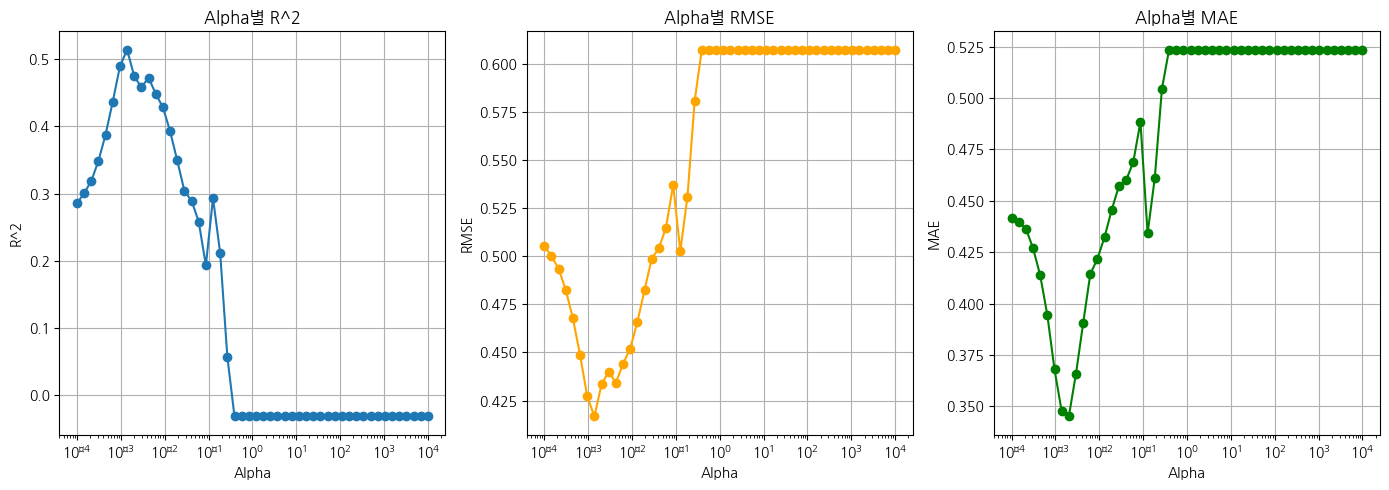

In [ ]:
alpha_values = np.logspace(-4, 4, 50)
r2_scores = []
rmse_scores = []
mae_scores = []

for alpha in alpha_values:
    lasso = Lasso(alpha=alpha, max_iter=1000)
    lasso.fit(X_reg_train, y_train)
    y_pred = lasso.predict(X_reg_test)

    # 성능 지표 계산
    r2_scores.append(r2_score(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_scores.append(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(14, 5))

# R^2 그래프
plt.subplot(1, 3, 1)
plt.plot(alpha_values, r2_scores, marker='o', label="R^2")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("R^2")
plt.title("Alpha별 R^2")
plt.grid(True)

# RMSE 그래프
plt.subplot(1, 3, 2)
plt.plot(alpha_values, rmse_scores, marker='o', color='orange', label="RMSE")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("Alpha별 RMSE")
plt.grid(True)

# MAE 그래프
plt.subplot(1, 3, 3)
plt.plot(alpha_values, mae_scores, marker='o', color='green', label="MAE")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("MAE")
plt.title("Alpha별 MAE")
plt.grid(True)

plt.tight_layout()
plt.show()

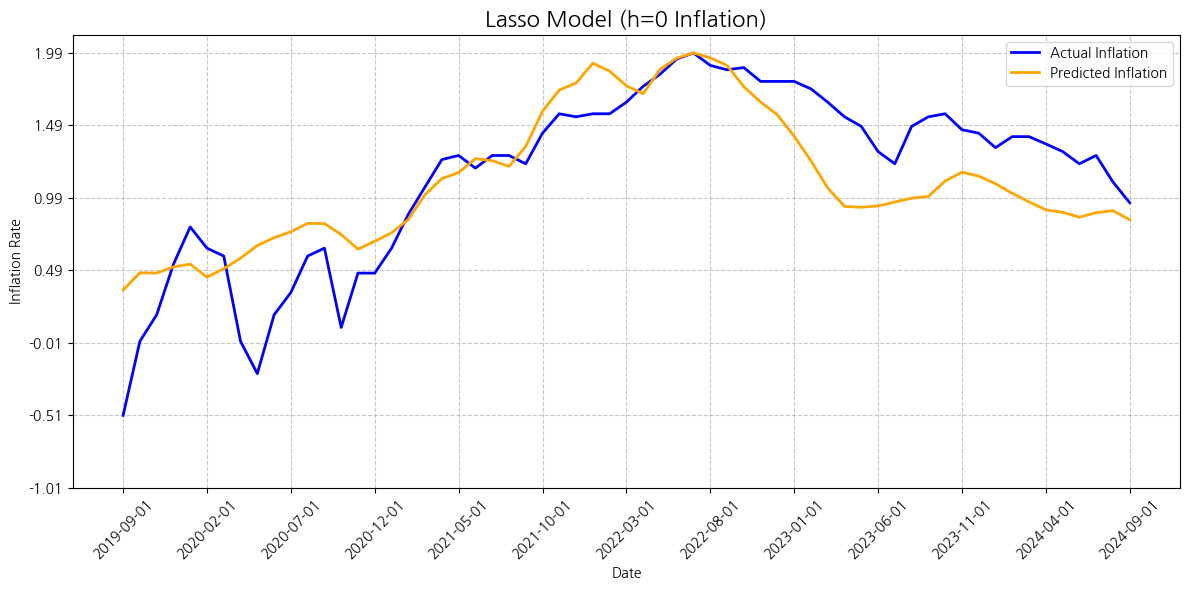

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Lasso 모델 예측값과 실제값 비교 그래프
plt.figure(figsize=(12, 6))  # 가로 크기를 넓게 설정

# 실제 인플레이션과 예측된 인플레이션 그래프
plt.plot(comparison_df.index, comparison_df['Actual Inflation'], label='Actual Inflation', color='blue', linewidth=2)
plt.plot(comparison_df.index, comparison_df['Predicted Inflation'], label='Predicted Inflation', color='orange', linewidth=2)

# 그래프 설정
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.title('Lasso Model (h=0 Inflation)', fontsize=16)

# Y축 범위 계산
y_min = comparison_df[['Actual Inflation', 'Predicted Inflation']].min().min() - 0.5
y_max = comparison_df[['Actual Inflation', 'Predicted Inflation']].max().max() + 0.5
plt.yticks(np.arange(y_min, y_max, 0.5))

# X축 레이블 간격 조정
plt.xticks(ticks=comparison_df.index[::5], rotation=45)  # 5개 간격으로 날짜 표시 및 45도 회전

# 범례와 그리드 추가
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # 여백 자동 조정
plt.show()

In [ ]:
# Ridge 모델
from sklearn.linear_model import Ridge

hyperparams = {'max_iter': [1000, 1500, 2000, 2500, 3000],
               'alpha': [0.001, 0.01, 0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

ridge_grid = GridSearchCV(
    estimator=Ridge(),
    param_grid=hyperparams,
    verbose=True,
    scoring='neg_root_mean_squared_error',
    cv=kfold,
    n_jobs=-1
)

ridge_grid.fit(X_reg_train, y_train)
print(ridge_grid.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
{'alpha': 0.1, 'max_iter': 1000}


In [ ]:
y_pred_ridge = ridge_grid.predict(X_reg_test)

mse_value_rd = mean_squared_error(y_test, y_pred_ridge)
rmse_value_rd = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_value_rd = mean_absolute_error(y_test, y_pred_ridge)
r2_value_rd = r2_score(y_test, y_pred_ridge)
mda_value_rd = mean_directional_accuracy(y_test, y_pred_ridge)

print("Test set MSE:", mse_value_rd)
print("Test set RMSE:", rmse_value_rd)
print("Test set MAE:", mae_value_rd)
print("Test set R²:", r2_value_rd)
print("Test set MDA:", mda_value_rd)

Test set MSE: 0.22893238519034861
Test set RMSE: 0.4784687922846678
Test set MAE: 0.4175073950333234
Test set R²: 0.35970653046407564
Test set MDA: 0.6


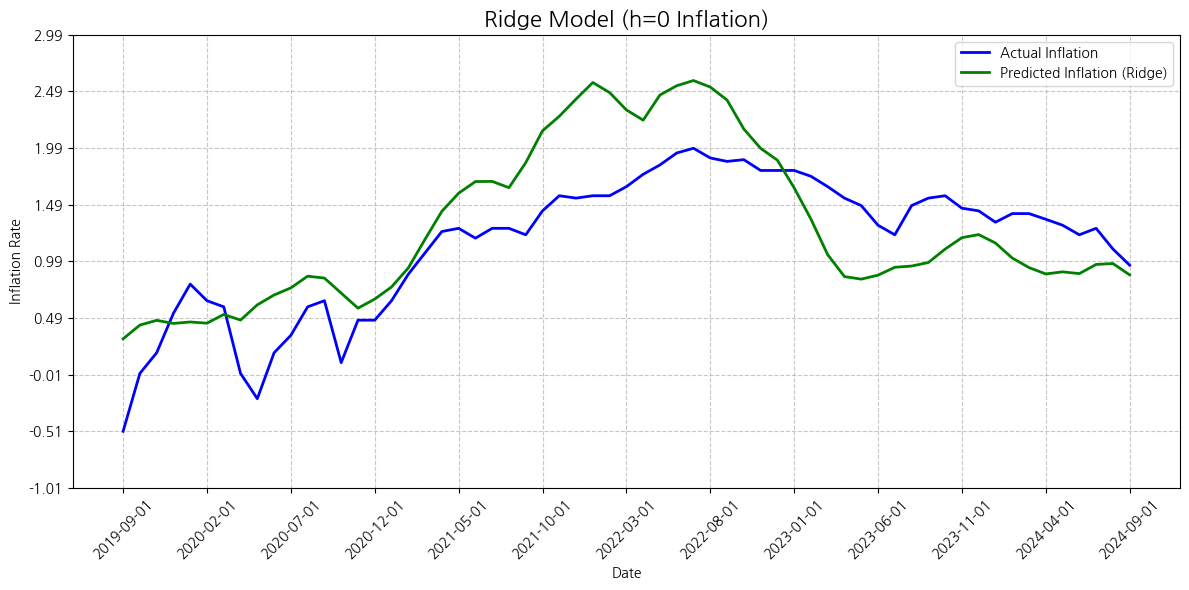

In [ ]:
# Ridge 예측값 추가
comparison_df['Ridge Predicted Inflation'] = y_pred_ridge

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df['Actual Inflation'], label='Actual Inflation', color='blue', linewidth=2)
plt.plot(comparison_df.index, comparison_df['Ridge Predicted Inflation'], label='Predicted Inflation (Ridge)', color='green', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.title('Ridge Model (h=0 Inflation)', fontsize=16)
y_min = comparison_df[['Actual Inflation', 'Ridge Predicted Inflation']].min().min() - 0.5
y_max = comparison_df[['Actual Inflation', 'Ridge Predicted Inflation']].max().max() + 0.5
plt.yticks(np.arange(y_min, y_max, 0.5))
plt.xticks(ticks=comparison_df.index[::5], rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

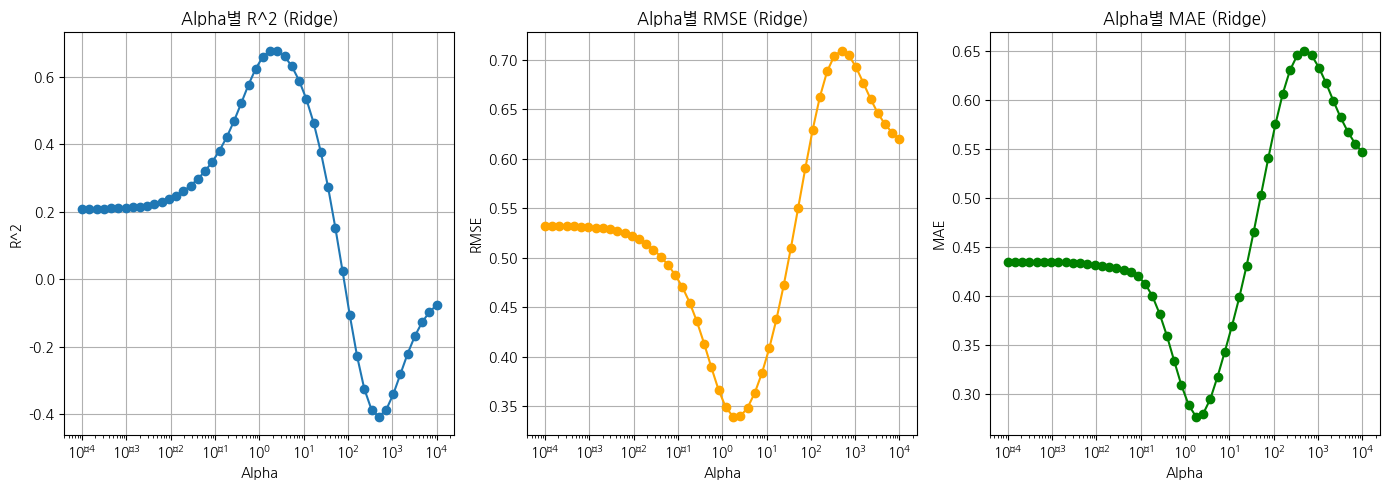

In [ ]:
alpha_values = np.logspace(-4, 4, 50)
r2_scores = []
rmse_scores = []
mae_scores = []

for alpha in alpha_values:
    ridge = Ridge(alpha=alpha, max_iter=3000)
    ridge.fit(X_reg_train, y_train)
    y_pred = ridge.predict(X_reg_test)

    # 성능 지표 계산
    r2_scores.append(r2_score(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_scores.append(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(14, 5))

# R^2 그래프
plt.subplot(1, 3, 1)
plt.plot(alpha_values, r2_scores, marker='o', label="R^2")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("R^2")
plt.title("Alpha별 R^2 (Ridge)")
plt.grid(True)

# RMSE 그래프
plt.subplot(1, 3, 2)
plt.plot(alpha_values, rmse_scores, marker='o', color='orange', label="RMSE")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("Alpha별 RMSE (Ridge)")
plt.grid(True)

# MAE 그래프
plt.subplot(1, 3, 3)
plt.plot(alpha_values, mae_scores, marker='o', color='green', label="MAE")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("MAE")
plt.title("Alpha별 MAE (Ridge)")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import ElasticNet

hyperparams = {
    'max_iter': [1000, 1500, 2000, 2500, 3000],
    'alpha': [0.001, 0.01, 0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

elastic_net_grid = GridSearchCV(
    estimator=ElasticNet(),
    param_grid=hyperparams,
    verbose=True,
    scoring='neg_root_mean_squared_error',
    cv=kfold,
    n_jobs=-1
)

elastic_net_grid.fit(X_reg_train, y_train)

print("Best Parameters:", elastic_net_grid.best_params_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.3, 'max_iter': 1000}


In [ ]:
en_model = elastic_net_grid.best_estimator_
y_pred_en = en_model.predict(X_reg_test)

# 성능 지표 계산
mse_value_en = mean_squared_error(y_test, y_pred_en)
rmse_value_en = np.sqrt(mse_value_en)
mae_value_en = mean_absolute_error(y_test, y_pred_en)
r2_value_en = r2_score(y_test, y_pred_en)
mda_value_en = mean_directional_accuracy(y_test, y_pred_en)

print("MSE:", mse_value_en)
print("RMSE:", rmse_value_en)
print("MAE:", mae_value_en)
print('R^2:', r2_value_en)
print("MDA:", mda_value_en)

MSE: 0.20673848722227836
RMSE: 0.4546850417841765
MAE: 0.400915315191506
R^2: 0.42177991479843446
MDA: 0.5833333333333334


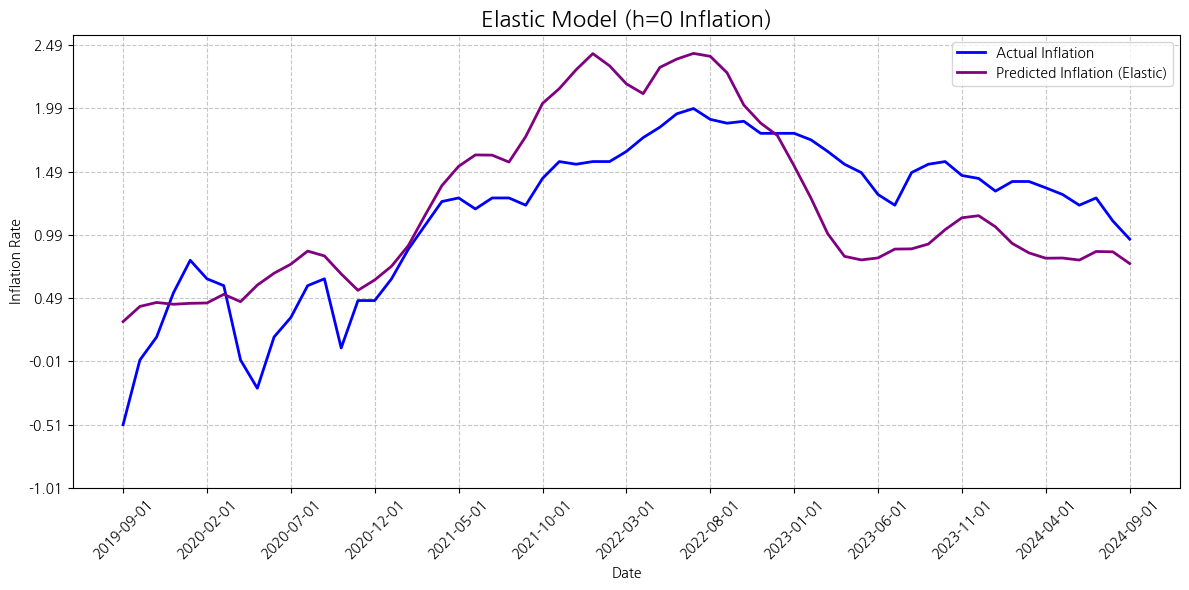

In [ ]:
# Ridge 예측값 추가
comparison_df['Ridge Predicted Inflation'] = y_pred_en

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df['Actual Inflation'], label='Actual Inflation', color='blue', linewidth=2)
plt.plot(comparison_df.index, comparison_df['Ridge Predicted Inflation'], label='Predicted Inflation (Elastic)', color='purple', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.title('Elastic Model (h=0 Inflation)', fontsize=16)
y_min = comparison_df[['Actual Inflation', 'Ridge Predicted Inflation']].min().min() - 0.5
y_max = comparison_df[['Actual Inflation', 'Ridge Predicted Inflation']].max().max() + 0.5
plt.yticks(np.arange(y_min, y_max, 0.5))
plt.xticks(ticks=comparison_df.index[::5], rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# CR 모델 성능 지표
cr_metrics = {
    'MSE': mse_cr,
    'RMSE': rmse_cr,
    'MAE': mae_cr,
    'R^2': r2_cr,
    'Adjusted R^2': adj_r2_cr,
    'MDA': mda_cr
}

# Best Subset 성능 지표
best_subset_metrics = {
    'MSE': mse_b,
    'RMSE': rmse_b,
    'MAE': mae_b,
    'R^2': r2_b,
    'Adjusted R^2': adj_r2_b,
    'MDA': mda_b
}

# DataFrame에 성능 지표 추가
reg_perform_df = pd.DataFrame({
    'Model': ['Lasso', 'Ridge', 'Elastic Net', 'Backward Selection', 'Best Subset', 'CR'],
    'MSE': [mse_value_ls, mse_value_rd, mse_value_en, mse_bss, best_subset_metrics['MSE'], cr_metrics['MSE']],
    'RMSE': [rmse_value_ls, rmse_value_rd, rmse_value_en, rmse_bss, best_subset_metrics['RMSE'], cr_metrics['RMSE']],
    'MAE': [mae_value_ls, mae_value_rd, mae_value_en, mae_bss, best_subset_metrics['MAE'], cr_metrics['MAE']],
    'R^2': [r2_value_ls, r2_value_rd, r2_value_en, r2_bss, best_subset_metrics['R^2'], cr_metrics['R^2']],
    'MDA': [mda_value_ls, mda_value_rd, mda_value_en, mda_bss, best_subset_metrics['MDA'], cr_metrics['MDA']]
})

# 행과 열을 변환하여 보기 쉽게 설정
reg_perform_df = reg_perform_df.set_index('Model').T

# 반환
reg_perform_df


Model,Lasso,Ridge,Elastic Net,Backward Selection,Best Subset,CR
MSE,0.180447,0.228932,0.206738,0.294306,0.299313,0.261203
RMSE,0.424791,0.478469,0.454685,0.542499,0.547095,0.511080
MAE,0.364371,0.417507,0.400915,0.477569,0.472908,0.459815
R^2,0.495314,0.359707,0.421780,0.176866,0.162860,0.321324
MDA,0.600000,0.600000,0.583333,0.600000,0.550000,0.525424


# 트리 기반 모델

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

total_size = len(merged_df)
train_size = int(total_size * 0.7)

X_train = merged_df.iloc[:train_size].drop(columns=['Inflation_rate'])
y_train = np.log1p(merged_df.iloc[:train_size]['Inflation_rate'])

X_test = merged_df.iloc[train_size:].drop(columns=['Inflation_rate'])
y_test = np.log1p(merged_df.iloc[train_size:]['Inflation_rate'])

# 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [ ]:
print("X_train_scaled:")
print(X_train_scaled.head())
print("\ny_train (log 변환):")
print(y_train.head())
print("\nX_test_scaled:")
print(X_test_scaled.head())
print("\ny_test (log 변환):")
print(y_test.head())

X_train_scaled:
            Personal Finance Current  Personal Finance Expected  \
Date                                                              
2007-12-01                 -0.135792                  -0.539424   
2008-01-01                 -0.135792                  -0.142768   
2008-02-01                 -0.311048                  -0.539424   
2008-03-01                 -0.354861                  -0.539424   
2008-04-01                 -0.661559                  -1.729392   

            Business Condition 12 Months  Business Condition 5 Years  \
Date                                                                   
2007-12-01                     -0.867140                   -0.525625   
2008-01-01                     -0.867140                   -0.043028   
2008-02-01                     -1.426165                   -0.387740   
2008-03-01                     -1.745608                   -0.525625   
2008-04-01                     -1.985190                   -1.215050   

         

In [ ]:
y_test.head()

,Inflation_rate
Date,
2019-09-01,-0.510826
2019-10-01,0.000000
2019-11-01,0.182322
2019-12-01,0.530628
2020-01-01,0.788457


1. Random Forest + Grid Search

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# 난수 고정
random_state = 42

n_estimators = [10, 20, 30]
max_depth = [10, 12, 15]
min_samples_split = [4, 5, 6]
min_samples_leaf = [4, 5, 6]

hyperparams = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

rf_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=random_state),
    param_grid=hyperparams,
    verbose=1,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

rf_grid.fit(X_train_scaled, y_train)

print("Best Parameters:", rf_grid.best_params_)
rf_model = rf_grid.best_estimator_

y_pred_rf = rf_model.predict(X_test_scaled)

# 성능 평가
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mda_rf = mean_directional_accuracy(y_test, y_pred_rf)

print('MSE:', mse_rf)
print('RMSE:', rmse_rf)
print('MAE:', mae_rf)
print('MDA:', mda_rf)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 10}
MSE: 0.31735294657894775
RMSE: 0.5633408795560177
MAE: 0.5045218145112176
MDA: 0.4666666666666667


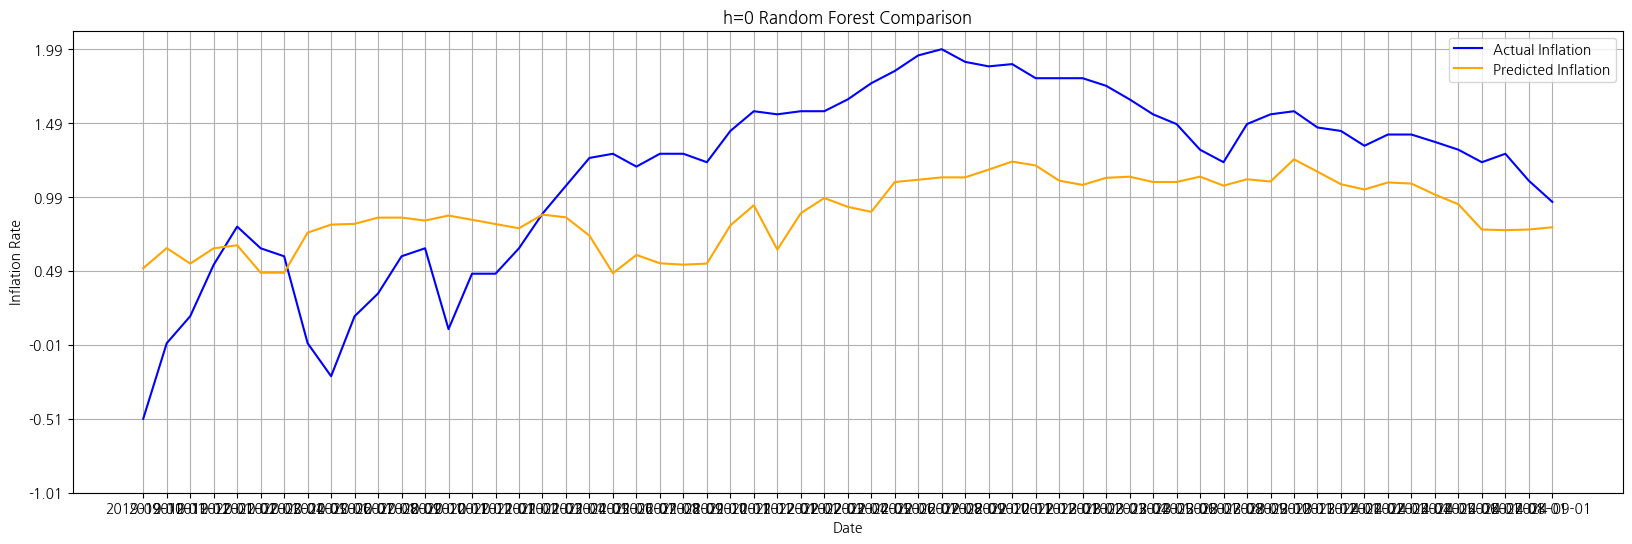

In [ ]:
import matplotlib.pyplot as plt
comparison_df = pd.DataFrame({
    'Date': merged_df.iloc[train_size:].index,
    'Actual Inflation': y_test,
    'Predicted Inflation': y_pred_rf
})

comparison_df.set_index('Date', inplace=True)

plt.figure(figsize=(20, 6))
plt.plot(comparison_df.index, comparison_df['Actual Inflation'], label='Actual Inflation', color='blue')
plt.plot(comparison_df.index, comparison_df['Predicted Inflation'], label='Predicted Inflation', color='orange')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.title('h=0 Random Forest Comparison')

y_min = comparison_df[['Actual Inflation', 'Predicted Inflation']].min().min() - 0.5
y_max = comparison_df[['Actual Inflation', 'Predicted Inflation']].max().max() + 0.5
plt.yticks(np.arange(y_min, y_max, 0.5))

plt.legend()
plt.grid(True)
plt.show()

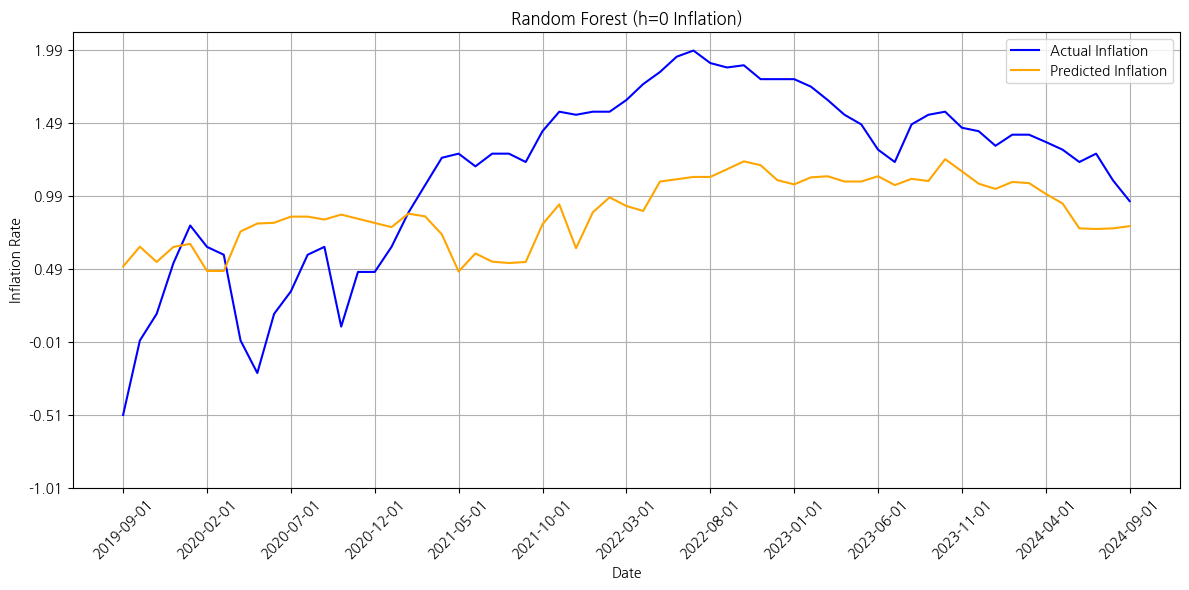

In [ ]:
plt.figure(figsize=(12, 6))  # 가로 크기를 넓게 설정
plt.plot(comparison_df.index, comparison_df['Actual Inflation'], label='Actual Inflation', color='blue')
plt.plot(comparison_df.index, comparison_df['Predicted Inflation'], label='Predicted Inflation', color='orange')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.title('Random Forest (h=0 Inflation)')

# Y축 범위 계산
y_min = comparison_df[['Actual Inflation', 'Predicted Inflation']].min().min() - 0.5
y_max = comparison_df[['Actual Inflation', 'Predicted Inflation']].max().max() + 0.5
plt.yticks(np.arange(y_min, y_max, 0.5))

# X축 레이블 간격 조정
plt.xticks(ticks=comparison_df.index[::5], rotation=45)  # 5개 간격으로 날짜 표시 및 45도 회전

plt.legend()
plt.grid(True)
plt.tight_layout()  # 여백 자동 조정
plt.show()

In [ ]:
importances_values = rf_model.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
importances_sorted = importances.sort_values(ascending=False)
top_20_importances = importances_sorted.head(20)

print(top_20_importances)

회사채(3년, AA-)                    0.220336
M1(평잔, 원계열)                     0.145156
회사채(3년, BBB-)                   0.086345
CPI                             0.076613
M1(말잔, 계절조정계열)                  0.076423
M1(평잔, 계절조정계열)                  0.071519
주택담보대출-예금취급기관                   0.067770
국고채(10년)                        0.065694
경기종합지수(동행지수순환변동치)               0.037772
Business Condition 12 Months    0.022013
국고채(1년)                         0.016821
소비자동향조사                         0.012674
Expected Index                  0.012662
GSCPI                           0.009032
WTI                             0.007792
관리물가지수                          0.006713
국고채1년 차분                        0.006052
Business Condition 5 Years      0.005321
원/미국달러(매매기준율) 평균                0.005204
무담보콜금리(1일)                      0.005110
dtype: float64


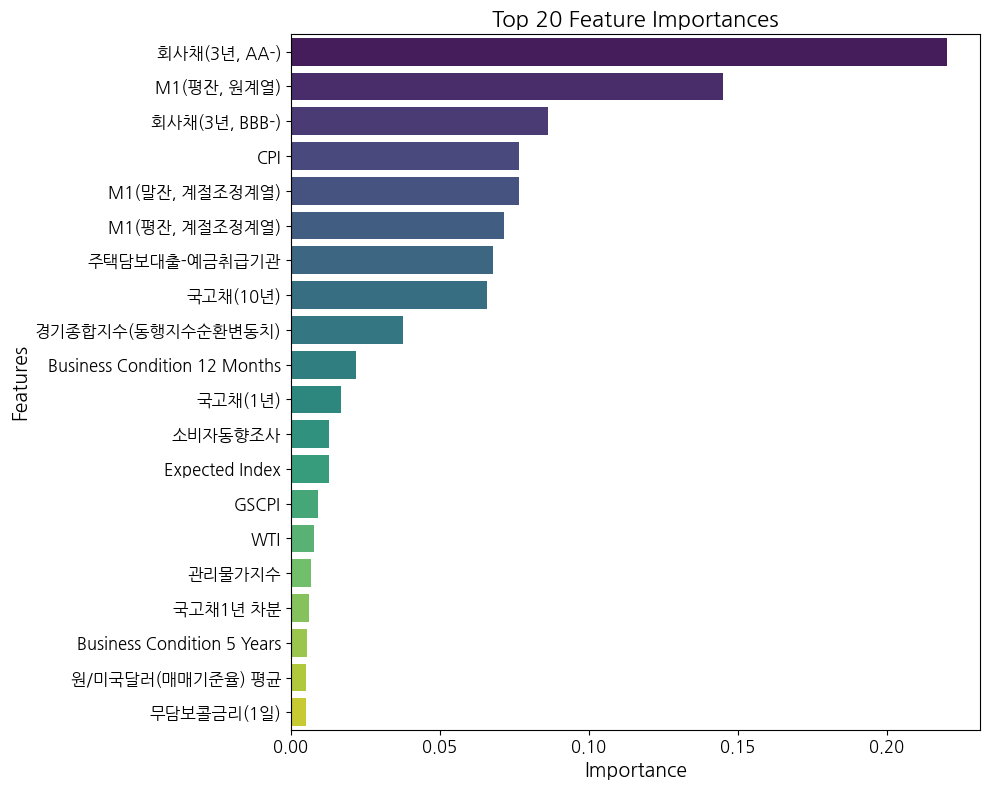

In [ ]:
importances_values = rf_model.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 8))
plt.title('Top 20 Feature Importances', fontsize=16)
sns.barplot(x=top20, y=top20.index, palette="viridis")
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
print(pd.DataFrame(rf_grid.cv_results_))

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.027393      0.000516         0.003177        0.000590   
1        0.050493      0.000802         0.003559        0.000262   
2        0.071637      0.002425         0.004221        0.000155   
3        0.026639      0.000575         0.002900        0.000102   
4        0.050240      0.001401         0.003472        0.000166   
..            ...           ...              ...             ...   
76       0.045665      0.001231         0.003421        0.000221   
77       0.065648      0.007265         0.004251        0.001107   
78       0.025306      0.001757         0.003019        0.000123   
79       0.043734      0.007436         0.003197        0.000419   
80       0.064676      0.002619         0.003516        0.000807   

    param_max_depth  param_min_samples_leaf  param_min_samples_split  \
0                10                       4                        4   
1                10                    

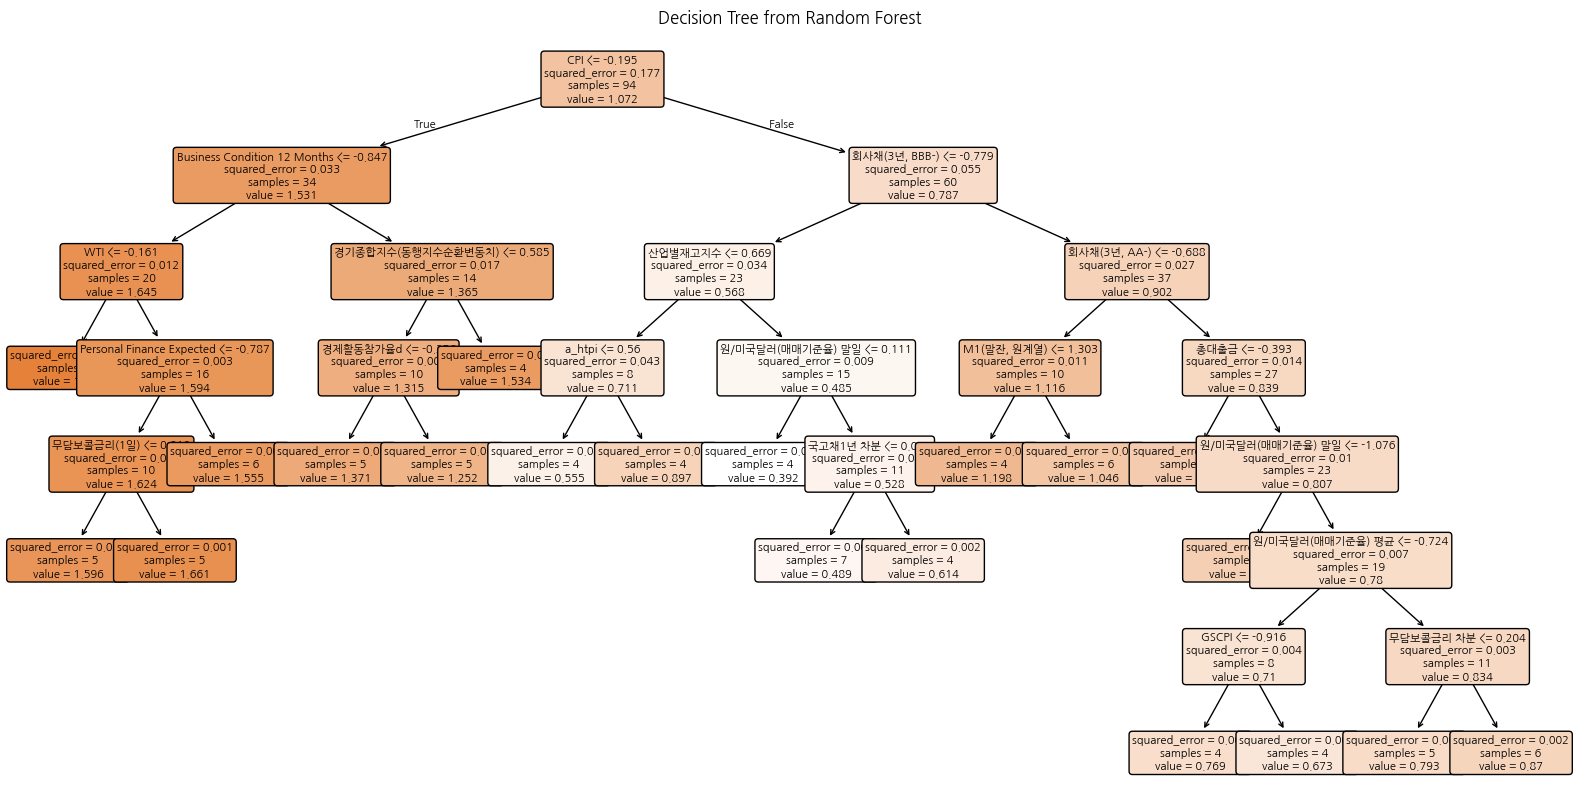

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 랜덤 포레스트의 첫 번째 트리 시각화
tree_to_plot = rf_model.estimators_[0]  # rf_model은 RandomForestRegressor 또는 RandomForestClassifier 객체

# 트리 시각화
plt.figure(figsize=(20, 10))  # 시각화를 위한 크기 조정
plot_tree(
    tree_to_plot,
    feature_names=X_train_scaled.columns,  # 피처 이름
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree from Random Forest")
plt.show()

2. Extra Tree + Grid Search

In [ ]:
print(X_train_scaled.isnull().sum().any())
print(X_test_scaled.isnull().sum().any())

False
False


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import numpy as np

random_state = 42

n_estimators = [10, 20, 30]
max_depth = [10, 12, 15]
min_samples_split = [4, 5, 6]
min_samples_leaf = [4, 5, 6]

hyperparams = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

et_grid = GridSearchCV(
    estimator=ExtraTreesRegressor(random_state=random_state),
    param_grid=hyperparams,
    verbose=1,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

et_grid.fit(X_train_scaled, y_train)

print("Best Parameters:", et_grid.best_params_)
et_model = et_grid.best_estimator_

y_pred_et = et_model.predict(X_test_scaled)

mse_et = mean_squared_error(y_test, y_pred_et)
rmse_et = np.sqrt(mse_et)
mae_et = mean_absolute_error(y_test, y_pred_et)
mda_et = mean_directional_accuracy(y_test, y_pred_et)

print('MSE:', mse_et)
print('RMSE:', rmse_et)
print('MAE:', mae_et)
print('MDA:', mda_et)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 10}
MSE: 0.3360340942018851
RMSE: 0.579684478144693
MAE: 0.525465958520967
MDA: 0.38333333333333336


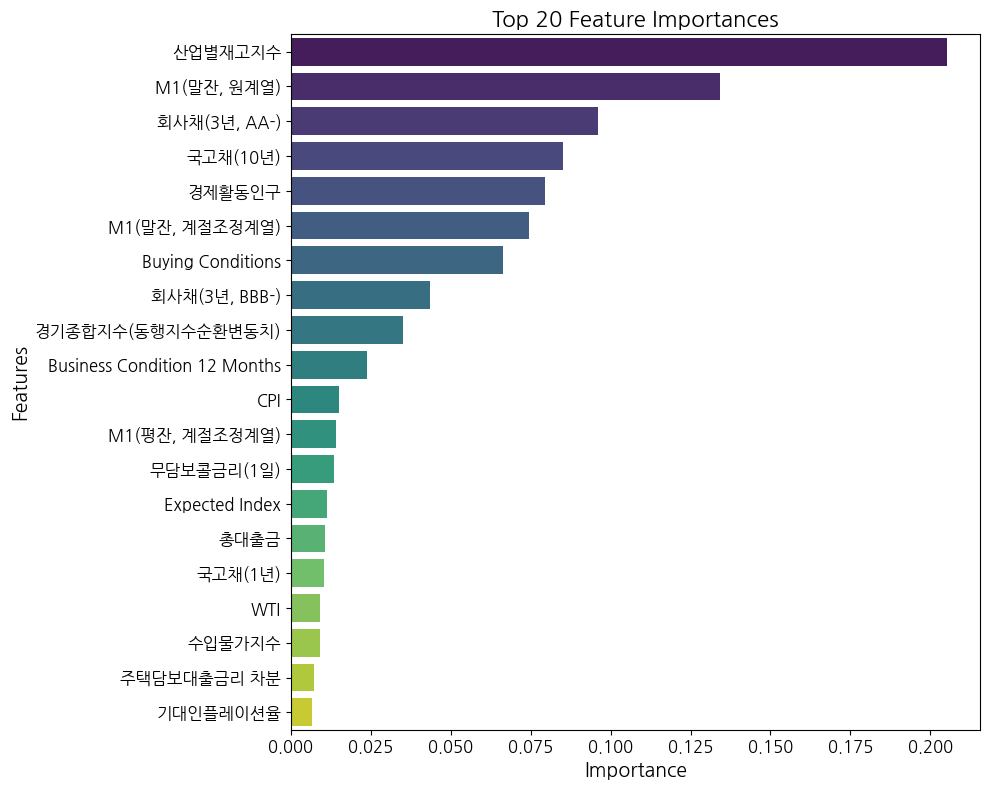

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extra Trees 모델에서 Feature Importance 가져오기
importances_values = et_model.feature_importances_
importances = pd.Series(importances_values, index=X_train_scaled.columns)  # X_train_scaled에 원래 피처 이름이 있다고 가정

# Top 20 Feature Importances 계산
top20 = importances.sort_values(ascending=False).head(20)

# 시각화
plt.figure(figsize=(10, 8))
plt.title('Top 20 Feature Importances', fontsize=16)
sns.barplot(x=top20, y=top20.index, palette="viridis")
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

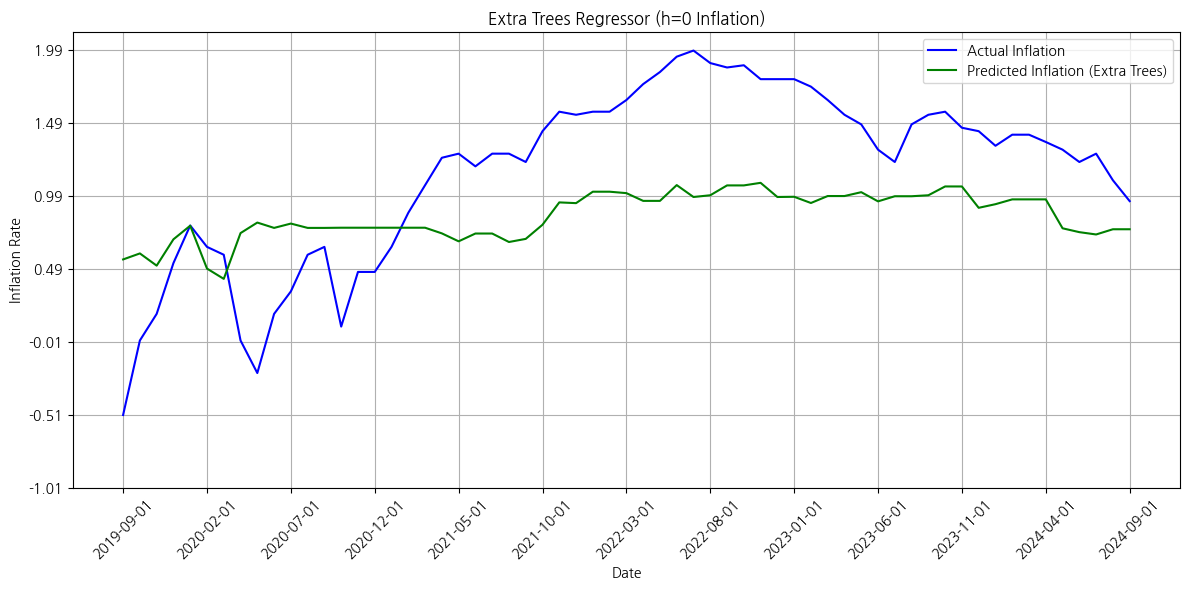

In [ ]:
comparison_df = pd.DataFrame({
    'Date': merged_df.iloc[train_size:].index,  # 테스트 데이터의 날짜 인덱스
    'Actual Inflation': y_test,  # 실제 값
    'Predicted Inflation (Extra Trees)': y_pred_et  # Extra Trees 예측 값
})

comparison_df.set_index('Date', inplace=True)  # 날짜를 인덱스로 설정

plt.figure(figsize=(12, 6))  # 가로 크기를 넓게 설정
plt.plot(comparison_df.index, comparison_df['Actual Inflation'], label='Actual Inflation', color='blue')
plt.plot(comparison_df.index, comparison_df['Predicted Inflation (Extra Trees)'], label='Predicted Inflation (Extra Trees)', color='green')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.title('Extra Trees Regressor (h=0 Inflation)')

# Y축 범위 계산
y_min = comparison_df[['Actual Inflation', 'Predicted Inflation (Extra Trees)']].min().min() - 0.5
y_max = comparison_df[['Actual Inflation', 'Predicted Inflation (Extra Trees)']].max().max() + 0.5
plt.yticks(np.arange(y_min, y_max, 0.5))

# X축 레이블 간격 조정
plt.xticks(ticks=comparison_df.index[::5], rotation=45)  # 5개 간격으로 날짜 표시 및 45도 회전

plt.legend()
plt.grid(True)
plt.tight_layout()  # 여백 자동 조정
plt.show()

# Voting Ensemble

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 각 모델의 최적 하이퍼파라미터
rf_best_params = {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 10}
et_best_params = {'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 10}
ridge_best_params = {'alpha': 0.1, 'max_iter': 1000}
lasso_best_params = {'alpha': 0.001, 'max_iter': 1000}
elastic_net_best_params = {'alpha': 0.001, 'l1_ratio': 0.3, 'max_iter': 1000}

# 최적 하이퍼파라미터로 모델 초기화
rf_model = RandomForestRegressor(**rf_best_params)
et_model = ExtraTreesRegressor(**et_best_params)
ridge_model = Ridge(**ridge_best_params)
lasso_model = Lasso(**lasso_best_params)
elastic_net_model = ElasticNet(**elastic_net_best_params)

# 모델 학습
rf_model.fit(X_train_scaled, y_train)
et_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_reg_train, y_train)
lasso_model.fit(X_reg_train, y_train)
elastic_net_model.fit(X_reg_train, y_train)

# 개별 모델 예측
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_et = et_model.predict(X_test_scaled)
y_pred_rd = ridge_model.predict(X_reg_test)
y_pred_lasso = lasso_model.predict(X_reg_test)
y_pred_elastic_net = elastic_net_model.predict(X_reg_test)

# 가중치 초기화
best_weights = None
best_mse = float('inf')
best_rmse = float('inf')
best_mae = float('inf')

# RMSE 최소화 가중치 탐색
for weight_rf in np.arange(0.0, 1.1, 0.1):
    for weight_et in np.arange(0.0, 1.1 - weight_rf, 0.1):
        for weight_rd in np.arange(0.0, 1.1 - weight_rf - weight_et, 0.1):
            for weight_lasso in np.arange(0.0, 1.1 - weight_rf - weight_et - weight_rd, 0.1):
                weight_elastic_net = 1.0 - weight_rf - weight_et - weight_rd - weight_lasso
                if weight_elastic_net < 0.0:
                    continue

                y_pred_weighted = (
                    weight_rf * y_pred_rf +
                    weight_et * y_pred_et +
                    weight_rd * y_pred_rd +
                    weight_lasso * y_pred_lasso +
                    weight_elastic_net * y_pred_elastic_net
                )

                mse = mean_squared_error(y_test, y_pred_weighted)
                rmse = np.sqrt(mse)
                mae = mean_absolute_error(y_test, y_pred_weighted)
                mda = mean_directional_accuracy(y_test, y_pred_weighted)

                if rmse < best_rmse:
                    best_weights = [weight_rf, weight_et, weight_rd, weight_lasso, weight_elastic_net]
                    best_mse = mse
                    best_rmse = rmse
                    best_mae = mae
                    best_mda = mda

print("Best Weights:", best_weights)
print("Best MSE:", best_mse)
print("Best RMSE:", best_rmse)
print("Best MAE:", best_mae)
print("Best MDA:", best_mda)

Best Weights: [0.2, 0.2, 0.6000000000000001, 0.0, 0.0]
Best MSE: 0.12177935669038513
Best RMSE: 0.34896899101551293
Best MAE: 0.28129548830332723
Best MDA: 0.6


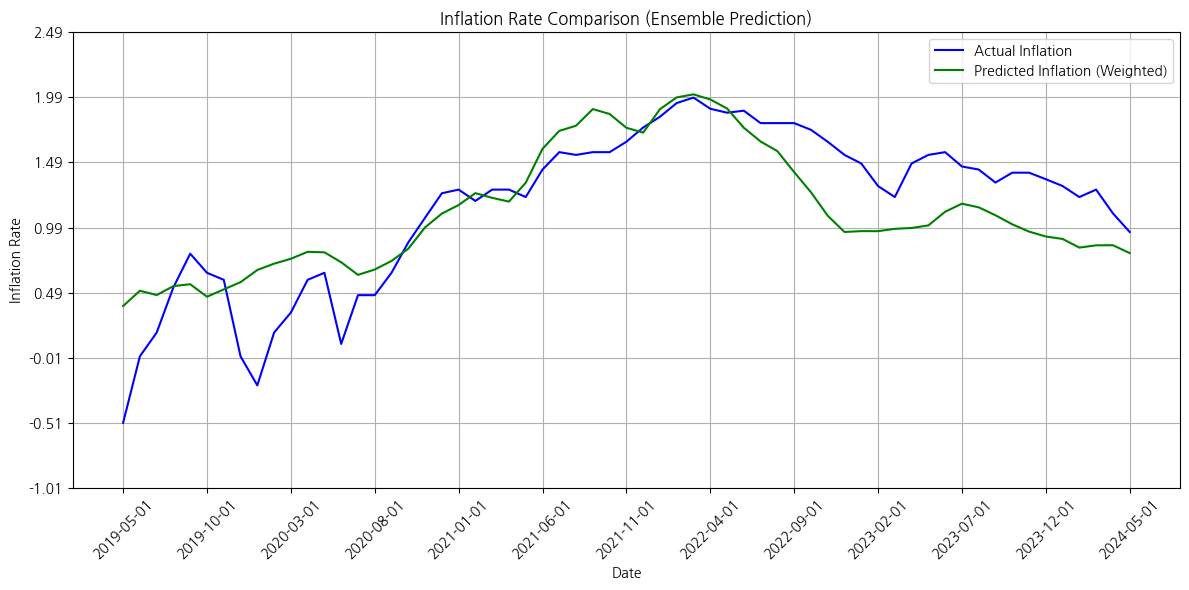

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 최적 가중치를 사용하여 예측값 계산
y_pred_weighted_best = (
    best_weights[0] * y_pred_rf +
    best_weights[1] * y_pred_et +
    best_weights[2] * y_pred_rd +
    best_weights[3] * y_pred_lasso +
    best_weights[4] * y_pred_elastic_net
)

# 비교 데이터프레임 생성
comparison_df = pd.DataFrame({
    'Date': merged_df.iloc[train_size:].index[:len(y_test)],  # 테스트 데이터 기간
    'Actual Inflation': y_test.values,
    'Predicted Inflation': y_pred_weighted_best
})

comparison_df.set_index('Date', inplace=True)

# 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df['Actual Inflation'], label='Actual Inflation', color='blue')
plt.plot(comparison_df.index, comparison_df['Predicted Inflation'], label='Predicted Inflation (Weighted)', color='green')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.title('Inflation Rate Comparison (Ensemble Prediction)')

# X축 레이블 간격 조정
tick_interval = 5  # 표시할 간격 (예: 5번째마다 표시)
plt.xticks(ticks=comparison_df.index[::tick_interval], rotation=45)

# y축 범위 설정
y_min = comparison_df[['Actual Inflation', 'Predicted Inflation']].min().min() - 0.5
y_max = comparison_df[['Actual Inflation', 'Predicted Inflation']].max().max() + 0.5
plt.yticks(np.arange(y_min, y_max, 0.5))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

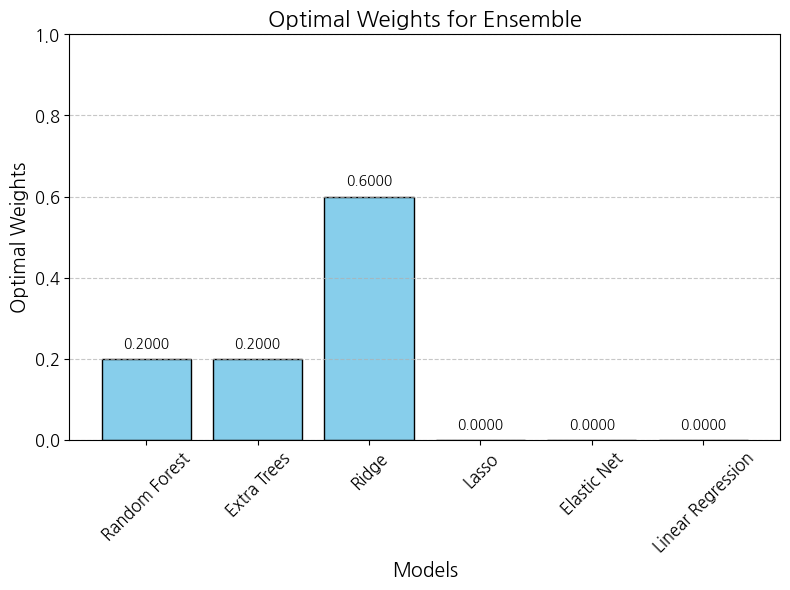

In [ ]:
import matplotlib.pyplot as plt

# 모델 이름 및 최적 가중치
model_names = ["Random Forest", "Extra Trees", "Ridge", "Lasso", "Elastic Net", "Linear Regression"]
weights = best_weights + [0.0]  # Linear Regression 모델의 가중치를 0으로 추가

# 막대 그래프 시각화
plt.figure(figsize=(8, 6))  # 가로 크기를 늘려 더 보기 좋게 설정
bars = plt.bar(model_names, weights, color='skyblue', edgecolor='black')
plt.xlabel('Models', fontsize=14)
plt.ylabel('Optimal Weights', fontsize=14)
plt.title('Optimal Weights for Ensemble', fontsize=16)
plt.ylim(0, 1)  # 가중치 범위는 0~1 사이
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 막대 위에 가중치 값 표시
for bar, weight in zip(bars, weights):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f"{weight:.4f}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
perform_df = pd.DataFrame({
    'Model': ['Lasso', 'Ridge',  'Elastic Net', 'Random Forest', 'Extra Trees', 'Ensemble'],
    'MSE': [mse_value_ls,mse_value_rd, mse_value_en, mse_rf, mse_et, best_mse],
    'RMSE': [rmse_value_ls,rmse_value_rd, rmse_value_en, rmse_rf, rmse_et, best_rmse],
    'MAE': [mae_value_ls,mae_value_rd, mae_value_en, mae_rf, mae_et, best_mae],
    'MDA': [mda_value_ls, mda_value_rd, mda_value_en, mda_rf, mda_et, best_mda]
})

perform_df = perform_df.set_index('Model').T
perform_df

Model,Lasso,Ridge,Elastic Net,Random Forest,Extra Trees,Ensemble
MSE,0.180447,0.228932,0.206738,0.317353,0.336034,0.121779
RMSE,0.424791,0.478469,0.454685,0.563341,0.579684,0.348969
MAE,0.364371,0.417507,0.400915,0.504522,0.525466,0.281295
MDA,0.600000,0.600000,0.583333,0.466667,0.383333,0.600000


In [ ]:
print(perform_df)

Model  Linear Regression     Lasso     Ridge  Elastic Net  Random Forest  \
MSE             0.261203  0.180447  0.228932     0.206738       0.317353   
RMSE            0.511080  0.424791  0.478469     0.454685       0.563341   
MAE             0.459815  0.364371  0.417507     0.400915       0.504522   
MDA             0.525424  0.600000  0.600000     0.583333       0.466667   

Model  Extra Trees  Ensemble  
MSE       0.336034  0.123161  
RMSE      0.579684  0.350943  
MAE       0.525466  0.281104  
MDA       0.383333  0.600000  


In [ ]:
perform_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso', 'Ridge',  'Elastic Net', 'Random Forest', 'Extra Trees', 'Ensemble'],
    'MSE': [mse_cr, mse_value_ls,mse_value_rd, mse_value_en, mse_rf, mse_et, best_mse],
    'RMSE': [rmse_cr, rmse_value_ls,rmse_value_rd, rmse_value_en, rmse_rf, rmse_et, best_rmse],
    'MAE': [mae_cr, mae_value_ls,mae_value_rd, mae_value_en, mae_rf, mae_et, best_mae],
    'MDA': [mda_cr, mda_value_ls, mda_value_rd, mda_value_en, mda_rf, mda_et, best_mda]
})

perform_df = perform_df.set_index('Model').T
perform_df

Model,Linear Regression,Lasso,Ridge,Elastic Net,Random Forest,Extra Trees,Ensemble
MSE,0.261203,0.180447,0.228932,0.206738,0.317353,0.336034,0.123161
RMSE,0.511080,0.424791,0.478469,0.454685,0.563341,0.579684,0.350943
MAE,0.459815,0.364371,0.417507,0.400915,0.504522,0.525466,0.281104
MDA,0.525424,0.600000,0.600000,0.583333,0.466667,0.383333,0.600000


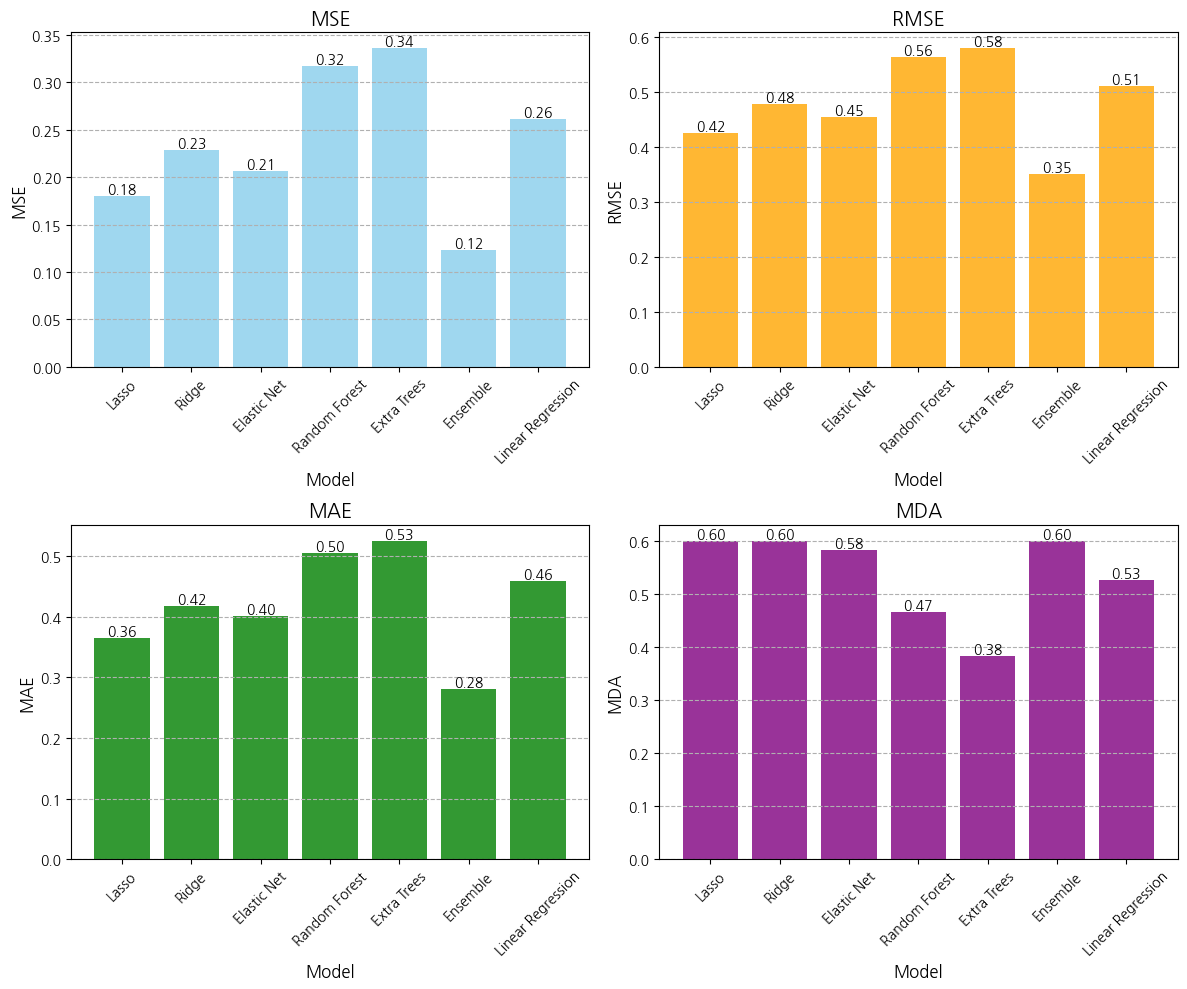

In [ ]:
import matplotlib.pyplot as plt

# 히스토그램 그리기
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=False)  # 2x2 레이아웃
metrics = ['MSE', 'RMSE', 'MAE', 'MDA']  # MDA 추가
colors = ['skyblue', 'orange', 'green', 'purple']  # 색상 추가

for i, metric in enumerate(metrics):
    row, col = divmod(i, 2)  # 행과 열 계산
    bars = axes[row, col].bar(perform_df.columns, perform_df.loc[metric], color=colors[i], alpha=0.8)
    axes[row, col].set_title(f'{metric}', fontsize=14)
    axes[row, col].set_xlabel('Model', fontsize=12)
    axes[row, col].set_ylabel(metric, fontsize=12)
    axes[row, col].grid(axis='y', linestyle='--')
    axes[row, col].tick_params(axis='x', rotation=45)

    # 막대 위에 값 표시
    for bar in bars:
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
                            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

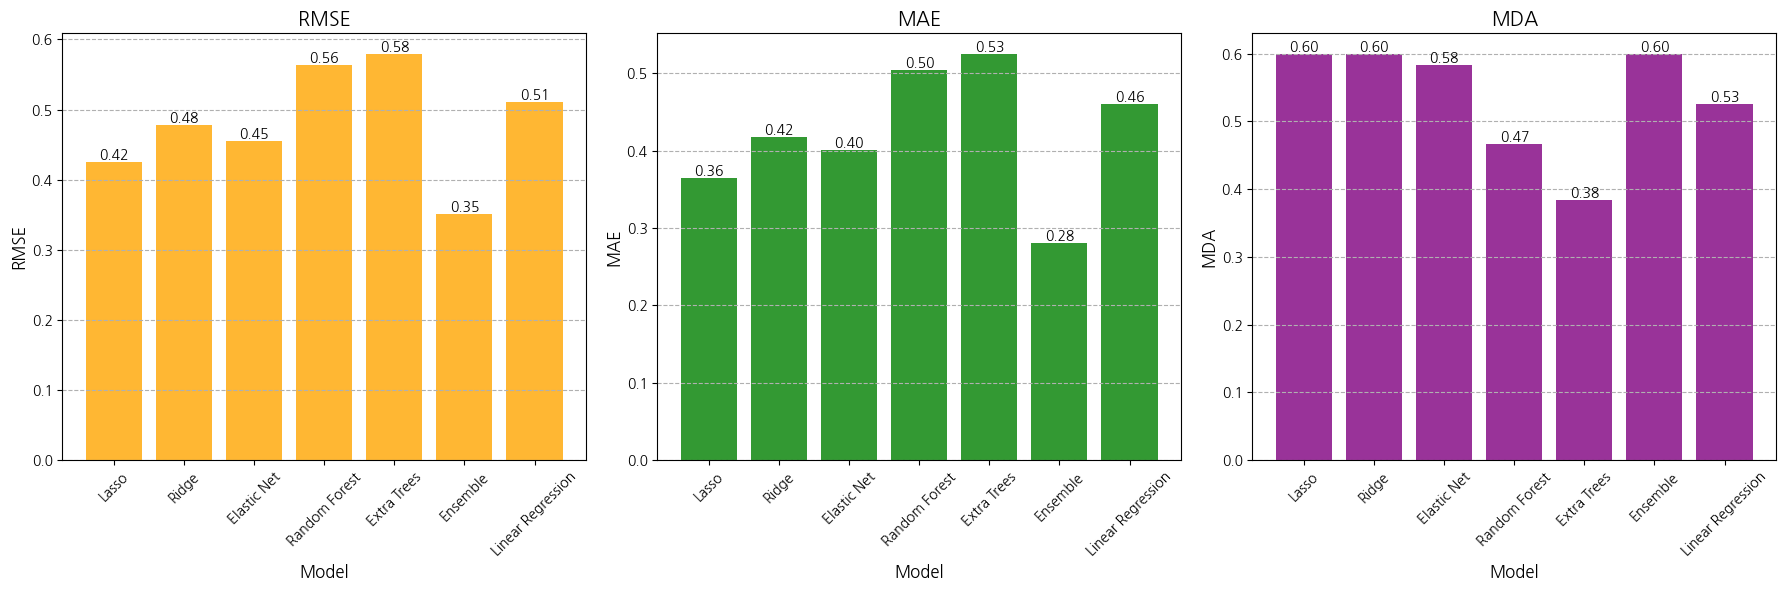

In [ ]:
import matplotlib.pyplot as plt

# CR 성능 지표 추가된 데이터프레임
perform_df['Linear Regression'] = reg_perform_df['CR']

# 히스토그램 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)  # 1x3 레이아웃
metrics = ['RMSE', 'MAE', 'MDA']  # MSE 제외
colors = ['orange', 'green', 'purple']  # 색상

for i, metric in enumerate(metrics):
    bars = axes[i].bar(perform_df.columns, perform_df.loc[metric], color=colors[i], alpha=0.8)
    axes[i].set_title(f'{metric}', fontsize=14)
    axes[i].set_xlabel('Model', fontsize=12)
    axes[i].set_ylabel(metric, fontsize=12)
    axes[i].grid(axis='y', linestyle='--')
    axes[i].tick_params(axis='x', rotation=45)

    # 막대 위에 값 표시
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
                     ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 목표변수 = 6개월 인플레이션

6개월 예측 수정
- shift period = 6으로 수정함

In [ ]:
merged_df.columns

Index(['Personal Finance Current', 'Personal Finance Expected',
       'Business Condition 12 Months', 'Business Condition 5 Years',
       'Buying Conditions', 'Current Index', 'Expected Index', 'CPI', 'GSCPI',
       'WTI', '총대출금', '무담보콜금리(1일)', '국고채(1년)', '국고채(10년)', '회사채(3년, AA-)',
       '회사채(3년, BBB-)', '주택담보대출-예금취급기관', '원/미국달러(매매기준율) 평균',
       '원/미국달러(매매기준율) 말일', 'M1(평잔, 원계열)', 'M1(말잔, 원계열)', 'M1(평잔, 계절조정계열)',
       'M1(말잔, 계절조정계열)', '금리 스프레드', '무담보콜금리 차분', '국고채1년 차분', '국고채10년 차분',
       '주택담보대출금리 차분', 'a_htpi', 'a_atpi', 'a_rpi', 'KOSPI', '경제활동인구',
       '경제활동참가율', '실업률', '경제활동참가율d', '실업률d', '전산업생산지수', '경기종합지수(동행지수순환변동치)',
       '제조업평균가동률', '산업별생산지수', '산업별출하지수', '산업별재고지수', '소매판매액지수', '소비자동향조사',
       '경제심리지수', '소비자물가지수', '기대인플레이션율', '관리물가지수', '생산자물가지수', '공급물가지수',
       '수입물가지수', '수입물량지수', '수입금액지수', '순상품교역조건지수', '소득교역조건지수',
       'Inflation_rate'],
      dtype='object')

In [ ]:
# 6개월 예측을 위해 shift
shift_period = 6
merged_df_1 = merged_df.copy()
merged_df_1['Inflation_rate_6m'] = merged_df['Inflation_rate'].shift(-shift_period)

In [ ]:
merged_df_1 = merged_df_1.drop(columns=['Inflation_rate']) # 타깃 학습을 위해 inf drop

In [ ]:
merged_df_1

,Personal Finance Current,Personal Finance Expected,Business Condition 12 Months,Business Condition 5 Years,Buying Conditions,Current Index,Expected Index,CPI,GSCPI,WTI,...,기대인플레이션율,관리물가지수,생산자물가지수,공급물가지수,수입물가지수,수입물량지수,수입금액지수,순상품교역조건지수,소득교역조건지수,Inflation_rate_6m
Date,,,,,,,,,,,,,,,,,,,,,
2007-12-01,98.0,112.0,68.0,81.0,137.0,91.0,65.6,211.445,-0.15,127.349998,...,3.0,93.229615,86.99,86.77,98.73,70.57,86.56,112.71,60.27,5.5
2008-01-01,98.0,116.0,68.0,88.0,146.0,94.4,68.1,212.174,-0.37,124.080002,...,3.2,92.970555,87.48,87.91,101.74,75.60,93.24,111.25,59.89,5.9
2008-02-01,94.0,112.0,54.0,83.0,123.0,83.8,62.4,212.687,0.45,115.459999,...,3.3,93.113425,88.29,89.44,104.50,67.39,84.45,110.11,55.28,5.6
2008-03-01,93.0,112.0,46.0,81.0,124.0,84.2,60.1,213.448,0.15,100.639999,...,3.5,94.002366,89.44,92.77,113.03,74.65,95.78,108.71,64.04,5.1
2008-04-01,86.0,100.0,40.0,71.0,112.0,77.0,53.3,213.942,0.13,67.809998,...,3.4,94.208742,91.34,95.53,117.32,73.41,98.08,106.96,63.28,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,91.0,111.0,79.0,84.0,88.0,69.6,68.8,313.225,-0.56,76.989998,...,3.2,108.286715,119.25,124.77,141.77,109.14,137.14,91.35,108.50,NaN
2024-06-01,81.0,106.0,84.0,88.0,88.0,65.9,69.6,313.049,-0.34,81.540001,...,3.0,108.325721,119.23,124.79,142.64,101.21,126.00,92.09,108.03,NaN
2024-07-01,79.0,105.0,86.0,84.0,81.0,62.7,68.8,313.534,-0.04,77.910004,...,2.9,107.082290,119.56,125.04,143.28,109.55,135.90,93.00,109.93,NaN


In [ ]:
merged_df = merged_df.fillna(method='ffill')

In [ ]:
# 결측치 처리
merged_df_1 = merged_df_1.dropna()

In [ ]:
merged_df_1.isnull().sum().any()

False

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

total_size = len(merged_df_1)
train_size = int(total_size * 0.7)

X_train_6m = merged_df_1.iloc[:train_size].drop(columns=['Inflation_rate_6m'])
y_train_6m = np.log1p(merged_df_1.iloc[:train_size]['Inflation_rate_6m'])

X_test_6m = merged_df_1.iloc[train_size:].drop(columns=['Inflation_rate_6m'])
y_test_6m = np.log1p(merged_df_1.iloc[train_size:]['Inflation_rate_6m'])

# 정규화
scaler = StandardScaler()
X_train_6m_scaled = scaler.fit_transform(X_train_6m)
X_test_6m_scaled = scaler.transform(X_test_6m)

X_train_6m_scaled = pd.DataFrame(X_train_6m_scaled, columns=X_train_6m.columns, index=X_train_6m.index)
X_test_6m_scaled = pd.DataFrame(X_test_6m_scaled, columns=X_test_6m.columns, index=X_test_6m.index)

print(X_train_6m_scaled.head())
print(X_test_6m_scaled.head())

            Personal Finance Current  Personal Finance Expected  \
Date                                                              
2007-12-01                 -0.098949                  -0.507880   
2008-01-01                 -0.098949                  -0.102168   
2008-02-01                 -0.276153                  -0.507880   
2008-03-01                 -0.320454                  -0.507880   
2008-04-01                 -0.630560                  -1.725014   

            Business Condition 12 Months  Business Condition 5 Years  \
Date                                                                   
2007-12-01                     -0.839779                   -0.497680   
2008-01-01                     -0.839779                   -0.012644   
2008-02-01                     -1.403551                   -0.359098   
2008-03-01                     -1.725706                   -0.497680   
2008-04-01                     -1.967323                   -1.190588   

            Buying Condit

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

random_state = 42

n_estimators_6 = [10, 20, 30]
max_depth_6 = [10, 12, 15]
min_samples_split_6 = [4, 5, 6]
min_samples_leaf_6 = [4, 5, 6]

hyperparams_6 = {
    'n_estimators': n_estimators_6,
    'max_depth': max_depth_6,
    'min_samples_split': min_samples_split_6,
    'min_samples_leaf': min_samples_leaf_6
}


rf_grid_6 = GridSearchCV(
    estimator=RandomForestRegressor(random_state=random_state),
    param_grid=hyperparams_6,
    verbose=True,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

rf_grid_6.fit(X_train_6m, y_train_6m)

print("Best Parameters:", rf_grid_6.best_params_)

rf_model_6 = rf_grid_6.best_estimator_

y_pred_rf_6 = rf_model_6.predict(X_test_6m)

mse_rf_6 = mean_squared_error(y_test_6m, y_pred_rf_6)
rmse_rf_6 = np.sqrt(mse_rf_6)
mae_rf_6 = mean_absolute_error(y_test_6m, y_pred_rf_6)
mda_rf_6 = mean_directional_accuracy(y_test_6m, y_pred_rf_6)

print('MSE:', mse_rf_6)
print('RMSE:', rmse_rf_6)
print('MAE:', mae_rf_6)
print('MDA:', mda_rf_6)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 10}
MSE: 0.5791641021970607
RMSE: 0.7610283189192507
MAE: 0.6826237815436335
MDA: 0.4827586206896552


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import numpy as np

random_state = 42

n_estimators = [10, 20, 30]
max_depth = [10, 12, 15]
min_samples_split = [4, 5, 6]
min_samples_leaf = [4, 5, 6]

hyperparams = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

et_grid_6 = GridSearchCV(
    estimator=ExtraTreesRegressor(random_state=random_state),
    param_grid=hyperparams,
    verbose=True,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

et_grid_6.fit(X_train_6m, y_train_6m)

print("Best Parameters:", et_grid_6.best_params_)

et_model_6 = et_grid_6.best_estimator_

y_pred_et_6 = et_model_6.predict(X_test_6m)

mse_et_6 = mean_squared_error(y_test_6m, y_pred_et_6)
rmse_et_6 = np.sqrt(mse_et_6)
mae_et_6 = mean_absolute_error(y_test_6m, y_pred_et_6)
mda_et_6 = mean_directional_accuracy(y_test_6m, y_pred_et_6)

print('MSE:', mse_et_6)
print('RMSE:', rmse_et_6)
print('MAE:', mae_et_6)
print('MDA:', mda_et_6)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 10}
MSE: 0.8245512298079402
RMSE: 0.9080480327647542
MAE: 0.7937625855240811
MDA: 0.39655172413793105


In [ ]:
perform_df_6months = pd.DataFrame({
    'Model': ['Random Forest', 'Extra Trees'],
    'MSE': [mse_rf_6, mse_et_6],
    'RMSE': [rmse_rf_6, rmse_et_6],
    'MAE': [mae_rf_6, mae_et_6],
    'MDA': [mda_rf_6, mda_et_6]
})

perform_df_6months = perform_df_6months.set_index('Model').T
perform_df_6months

Model,Random Forest,Extra Trees
MSE,0.579164,0.824551
RMSE,0.761028,0.908048
MAE,0.682624,0.793763
MDA,0.482759,0.396552


In [ ]:
perform_df # 기존의 당월 예측 값

Model,Lasso,Ridge,Elastic Net,Random Forest,Extra Trees,Ensemble,Linear Regression
MSE,0.180447,0.228932,0.206738,0.317353,0.336034,0.123161,0.261203
RMSE,0.424791,0.478469,0.454685,0.563341,0.579684,0.350943,0.511080
MAE,0.364371,0.417507,0.400915,0.504522,0.525466,0.281104,0.459815
MDA,0.600000,0.600000,0.583333,0.466667,0.383333,0.600000,0.525424


### 회귀 모델

In [ ]:
months_shift_6 = merged_df.copy()
months_shift_6['target'] = months_shift_6['Inflation_rate'].shift(-6)
months_shift_6 = months_shift_6.dropna()

In [ ]:
max_lag = 6
variables = months_shift_6.columns.difference(['Inflation_rate', 'target'])

# 각 변수에 대해 그레인저 인과 검정을 수행하여 최적 시차를 찾기
results = {}
p_results = []
for var in variables:
    # Granger 인과관계 검정 수행 (verbose=False로 출력을 최소화)
    test_result = grangercausalitytests(months_shift_6[['target', var]], max_lag, verbose=False)

    # 각 시차의 p-value를 저장
    lag_p_values = [(lag, test[0]['ssr_ftest'][1]) for lag, test in test_result.items()]

    # p-value가 가장 작은 시차 선택
    optimal_lag = min(lag_p_values, key=lambda x: x[1])[0]
    results[var] = (optimal_lag, lag_p_values)

# p-value가 0.05 이하인 결과만 필터링하여 출력
for var, (lag, p_values) in results.items():
    # p-value가 0.05 이하인 시차들만 선택
    significant_lags = [(lag, p_val) for lag, p_val in p_values if p_val <= 0.05]
    if significant_lags:
        p_results.append(var)

merged_granger = months_shift_6.copy()
for var, optimal_lag in results.items():
    # p_result에 포함된 변수명만 대상으로
    if var in p_results and var in months_shift_6.columns:
        # 최적 시차가 0보다 클 경우에만 shift() 적용
        if optimal_lag[0] > 0:
            merged_granger[f'{var}'] = months_shift_6[var].shift(optimal_lag[0])

common_variables = [var for var in p_results if var in months_shift_6.columns]

# 겹치는 변수들만 새로운 데이터프레임에 저장
merged_granger = merged_granger[common_variables]
merged_granger = pd.merge(merged_granger, months_shift_6[['target']], left_index=True, right_index=True, how='inner')
merged_granger = merged_granger.fillna(method='bfill')


##train/test###
# 독립 변수(X)와 종속 변수(y) 분리
X = merged_granger.drop(columns=['target'])  # 독립 변수
y = merged_granger['target']  # 타깃 변수 (6개월 후 인플레이션율)

original_index = X.index
original_columns = X.columns

# 스케일링
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)
y = np.log1p(y)

X = pd.DataFrame(X, index=original_index, columns=original_columns)
total_size = len(X)
train_size = int(total_size * 0.7)

# 학습 데이터 (70%)
X_train_6m_reg = X.iloc[:train_size]
y_train_6m_reg = y.iloc[:train_size]

# 테스트 데이터 (30%)
X_test_6m_reg = X.iloc[train_size:]
y_test_6m_reg = y.iloc[train_size:]

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# 하이퍼파라미터 설정
hyperparams = {
    'max_iter': [1000, 1500, 2000, 2500, 3000],
    'alpha': [0.001, 0.01, 0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

lasso_grid = GridSearchCV(
    estimator=Lasso(),
    param_grid=hyperparams,
    verbose=True,
    scoring='neg_root_mean_squared_error',
    cv=kfold,
    # 여기서 객체로 Kfold를 넣어준 것입니다.
    # 원래 내부적으로 KFold가 사용되는데, 이걸 정수로 두면 randomstate를 고정할 수 없어서
    # 성능이 동일하지 않습니다.
    n_jobs=-1
)

lasso_grid.fit(X_train_6m_reg, y_train_6m_reg)
lasso_model = lasso_grid.best_estimator_

print("Best parameters:", lasso_grid.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters: {'alpha': 0.001, 'max_iter': 1000}


In [ ]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
# 테스트 세트에서 성능 평가
y_pred_lasso_6 = lasso_model.predict(X_test_6m_reg)

mse_value_ls_6 = mean_squared_error(y_test_6m_reg, y_pred_lasso_6)
rmse_value_ls_6 = np.sqrt(mean_squared_error(y_test_6m_reg, y_pred_lasso_6))
mae_value_ls_6 = mean_absolute_error(y_test_6m_reg, y_pred_lasso_6)
r2_value_ls_6 = r2_score(y_test_6m_reg, y_pred_lasso_6)
mda_value_ls_6 = mean_directional_accuracy(y_test_6m_reg, y_pred_lasso_6)

print("Test set MSE:", mse_value_ls_6)
print("Test set RMSE:", rmse_value_ls_6)
print("Test set MAE:", mae_value_ls_6)
print("Test set R²:", r2_value_ls_6)
print("Test set MDA:", mda_value_ls_6)

Test set MSE: 4.147335636934329
Test set RMSE: 2.0365008315574853
Test set MAE: 1.7573999600385581
Test set R²: -12.941387506543386
Test set MDA: 0.4482758620689655


In [ ]:
# Ridge 모델
from sklearn.linear_model import Ridge

hyperparams = {'max_iter': [1000, 1500, 2000, 2500, 3000],
               'alpha': [0.001, 0.01, 0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

ridge_grid = GridSearchCV(
    estimator=Ridge(),
    param_grid=hyperparams,
    verbose=True,
    scoring='neg_root_mean_squared_error',
    cv=kfold,
    n_jobs=-1
)

ridge_grid.fit(X_train_6m_reg, y_train_6m_reg)
print(ridge_grid.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
{'alpha': 0.1, 'max_iter': 1000}


In [ ]:
y_pred_ridge_6 = ridge_grid.predict(X_test_6m_reg)

mse_value_rd_6 = mean_squared_error(y_test_6m_reg, y_pred_ridge_6)
rmse_value_rd_6 = np.sqrt(mean_squared_error(y_test_6m_reg, y_pred_ridge_6))
mae_value_rd_6 = mean_absolute_error(y_test_6m_reg, y_pred_ridge_6)
r2_value_rd_6 = r2_score(y_test_6m_reg, y_pred_ridge_6)
mda_value_rd_6 = mean_directional_accuracy(y_test_6m_reg, y_pred_ridge_6)

print("Test set MSE:", mse_value_rd_6)
print("Test set RMSE:", rmse_value_rd_6)
print("Test set MAE:", mae_value_rd_6)
print("Test set R²:", r2_value_rd_6)
print("Test set MDa:", mda_value_rd_6)

Test set MSE: 5.68924632217665
Test set RMSE: 2.3852141040536905
Test set MAE: 2.0297202417432385
Test set R²: -18.124564429097198
Test set MDa: 0.4827586206896552


In [ ]:
from sklearn.linear_model import ElasticNet

hyperparams = {
    'max_iter': [1000, 1500, 2000, 2500, 3000],
    'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

elastic_net_grid = GridSearchCV(
    estimator=ElasticNet(),
    param_grid=hyperparams,
    verbose=True,
    scoring='neg_root_mean_squared_error',
    cv=kfold,
    n_jobs=-1
)

elastic_net_grid.fit(X_train_6m_reg, y_train_6m_reg)

print("Best Parameters:", elastic_net_grid.best_params_)

en_model = elastic_net_grid.best_estimator_
y_pred_en_6 = en_model.predict(X_test_6m_reg)

# 성능 지표 계산
mse_value_en_6 = mean_squared_error(y_test_6m_reg, y_pred_en_6)
rmse_value_en_6 = np.sqrt(mse_value_en_6)
mae_value_en_6 = mean_absolute_error(y_test_6m_reg, y_pred_en_6)
r2_value_en_6 = r2_score(y_test_6m_reg, y_pred_en_6)
mda_value_en_6 = mean_directional_accuracy(y_test_6m_reg, y_pred_en_6)

print("MSE:", mse_value_en_6)
print("RMSE:", rmse_value_en_6)
print("MAE:", mae_value_en_6)
print('R^2:', r2_value_en_6)
print('MDA:', mda_value_en_6)

Fitting 5 folds for each of 350 candidates, totalling 1750 fits
Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.1, 'max_iter': 1000}
MSE: 1.2342660740143712
RMSE: 1.11097528055955
MAE: 1.0004952258117479
R^2: -3.1490207522084805
MDA: 0.4482758620689655


In [ ]:
perform_df_6months = pd.DataFrame({
    'Model': ['Random Forest', 'Extra Trees', 'Ridge', 'Lasso', 'Elastic Net'],
    'MSE': [mse_rf_6, mse_et_6, mse_value_rd_6, mse_value_ls_6, mse_value_en_6],
    'RMSE': [rmse_rf_6, rmse_et_6, rmse_value_rd_6, rmse_value_ls_6, rmse_value_en_6],
    'MAE': [mae_rf_6, mae_et_6, mae_value_en_6, mae_value_ls_6, mae_value_en_6],
    'MDA': [mda_rf_6, mda_et_6, mda_value_rd_6, mda_value_ls_6, mda_value_en_6]
})

perform_df_6months = perform_df_6months.set_index('Model').T
perform_df_6months

Model,Random Forest,Extra Trees,Ridge,Lasso,Elastic Net
MSE,0.579164,0.824551,5.689246,4.147336,1.234266
RMSE,0.761028,0.908048,2.385214,2.036501,1.110975
MAE,0.682624,0.793763,1.000495,1.757400,1.000495
MDA,0.482759,0.396552,0.482759,0.448276,0.448276


In [ ]:
print(y_train_6m)
print(y_train_6m_reg)

Date
2007-12-01    1.871802
2008-01-01    1.931521
2008-02-01    1.887070
2008-03-01    1.808289
2008-04-01    1.757858
                ...   
2018-12-01    0.530628
2019-01-01    0.470004
2019-02-01    0.000000
2019-03-01   -0.510826
2019-04-01    0.000000
Name: Inflation_rate_6m, Length: 137, dtype: float64
Date
2007-12-01    1.871802
2008-01-01    1.931521
2008-02-01    1.887070
2008-03-01    1.808289
2008-04-01    1.757858
                ...   
2018-12-01    0.530628
2019-01-01    0.470004
2019-02-01    0.000000
2019-03-01   -0.510826
2019-04-01    0.000000
Name: target, Length: 137, dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 각 모델의 최적 하이퍼파라미터
rf_best_params_6m = {'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 10}
et_best_params_6m = {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 10}
ridge_best_params_6m = {'alpha': 0.1, 'max_iter': 1000}
lasso_best_params_6m = {'alpha': 0.001, 'max_iter': 1000}
elastic_net_best_params_6m = {'alpha': 0.1, 'l1_ratio': 0.1, 'max_iter': 1000}

# 최적 하이퍼파라미터로 모델 초기화
rf_model_6m = RandomForestRegressor(**rf_best_params_6m)
et_model_6m = ExtraTreesRegressor(**et_best_params_6m)
ridge_model_6m = Ridge(**ridge_best_params_6m)
lasso_model_6m = Lasso(**lasso_best_params_6m)
elastic_net_model_6m = ElasticNet(**elastic_net_best_params_6m)

# 모델 학습
rf_model_6m.fit(X_train_6m, y_train_6m)
et_model_6m.fit(X_train_6m, y_train_6m)
ridge_model_6m.fit(X_train_6m_reg, y_train_6m)
lasso_model_6m.fit(X_train_6m_reg, y_train_6m)
elastic_net_model_6m.fit(X_train_6m_reg, y_train_6m)

# 개별 모델 예측
y_pred_rf_6m = rf_model_6m.predict(X_test_6m)
y_pred_et_6m = et_model_6m.predict(X_test_6m)
y_pred_ridge_6m = ridge_model_6m.predict(X_test_6m_reg)
y_pred_lasso_6m = lasso_model_6m.predict(X_test_6m_reg)
y_pred_elastic_net_6m = elastic_net_model_6m.predict(X_test_6m_reg)

# 가중치 초기화
best_weights_6m = None
best_mse_6m = float('inf')
best_rmse_6m = float('inf')
best_mae_6m = float('inf')

# RMSE 기준 가중치 탐색
for weight_rf_6m in np.arange(0.0, 1.1, 0.1):
    for weight_et_6m in np.arange(0.0, 1.1 - weight_rf_6m, 0.1):
        for weight_ridge_6m in np.arange(0.0, 1.1 - weight_rf_6m - weight_et_6m, 0.1):
            for weight_lasso_6m in np.arange(0.0, 1.1 - weight_rf_6m - weight_et_6m - weight_ridge_6m, 0.1):
                weight_elastic_net_6m = 1.0 - weight_rf_6m - weight_et_6m - weight_ridge_6m - weight_lasso_6m
                if weight_elastic_net_6m < 0.0:
                    continue

                y_pred_weighted_6m = (
                    weight_rf_6m * y_pred_rf_6m +
                    weight_et_6m * y_pred_et_6m +
                    weight_ridge_6m * y_pred_ridge_6m +
                    weight_lasso_6m * y_pred_lasso_6m +
                    weight_elastic_net_6m * y_pred_elastic_net_6m
                )

                mse_6m = mean_squared_error(y_test_6m, y_pred_weighted_6m)
                rmse_6m = np.sqrt(mse_6m)
                mae_6m = mean_absolute_error(y_test_6m, y_pred_weighted_6m)

                # 조건 수정: 동일한 RMSE일 경우, 가장 먼저 발견된 가중치를 유지
                if rmse_6m < best_rmse_6m or (rmse_6m == best_rmse_6m and best_weights_6m is None):
                    best_weights_6m = [weight_rf_6m, weight_et_6m, weight_ridge_6m, weight_lasso_6m, weight_elastic_net_6m]
                    best_mse_6m = mse_6m
                    best_rmse_6m = rmse_6m
                    best_mae_6m = mae_6m

print("Best Weights (6 months):", best_weights_6m)
print("Best MSE (6 months):", best_mse_6m)
print("Best RMSE (6 months):", best_rmse_6m)
print("Best MAE (6 months):", best_mae_6m)

Best Weights (6 months): [1.0, 0.0, 0.0, 0.0, 0.0]
Best MSE (6 months): 0.790964629014542
Best RMSE (6 months): 0.8893619223997292
Best MAE (6 months): 0.7955460945867087


In [ ]:
# RMSE 최소화 시키는 방식의 가중치
from scipy.optimize import minimize
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 개별 모델 예측
y_pred_models_6m = np.array([
    y_pred_rf_6m,
    y_pred_et_6m,
    y_pred_ridge_6m,
    y_pred_lasso_6m,
    y_pred_elastic_net_6m
]).T

# 목적 함수 정의 (RMSE 최소화)
def objective(weights):
    # 가중치를 모델 예측값에 곱해서 가중 합을 계산
    y_pred_weighted = np.dot(y_pred_models_6m, weights)
    rmse = np.sqrt(mean_squared_error(y_test_6m, y_pred_weighted))
    return rmse

# 가중치의 합이 1이 되도록 제약 조건 설정
def constraint_sum_to_one(weights):
    return np.sum(weights) - 1.0

# 초기 가중치 설정 (균등 가중치)
initial_weights = np.ones(y_pred_models_6m.shape[1]) / y_pred_models_6m.shape[1]

# 가중치 범위 설정 (0 <= w <= 1)
bounds = [(0.0, 1.0) for _ in range(y_pred_models_6m.shape[1])]

# 제약 조건 정의
constraints = {'type': 'eq', 'fun': constraint_sum_to_one}

# 최적화 실행
result = minimize(
    objective,
    initial_weights,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# 최적 가중치 및 결과 출력
best_weights_6m = result.x
best_rmse_6m = result.fun

print("Best Weights (6 months):", best_weights_6m)
print("Best RMSE (6 months):", best_rmse_6m)

# 최적 가중치로 계산한 추가 지표
y_pred_optimized_6m = np.dot(y_pred_models_6m, best_weights_6m)
best_mse_6m = mean_squared_error(y_test_6m, y_pred_optimized_6m)
best_mae_6m = mean_absolute_error(y_test_6m, y_pred_optimized_6m)

# MDA 계산
actual_directions = np.sign(np.diff(y_test_6m))  # 실제값의 변화 방향
predicted_directions = np.sign(np.diff(y_pred_optimized_6m))  # 예측값의 변화 방향
common_index = range(1, len(y_test_6m))  # diff 후 인덱스 맞추기
mda_6m = (actual_directions == predicted_directions).mean()

print("Best MSE (6 months):", best_mse_6m)
print("Best MAE (6 months):", best_mae_6m)
print("Best MDA (6 months):", mda_6m)

Best Weights (6 months): [1.00000000e+00 0.00000000e+00 1.94289029e-16 4.16333634e-17
 1.11022302e-16]
Best RMSE (6 months): 0.8893619223997293
Best MSE (6 months): 0.7909646290145422
Best MAE (6 months): 0.7955460945867087
Best MDA (6 months): 0.4482758620689655


In [ ]:
perform_df_6months = pd.DataFrame({
    'Model': ['Random Forest', 'Extra Trees', 'Ridge', 'Lasso', 'Elastic Net', 'Ensemble'],
    'MSE': [mse_rf_6, mse_et_6, mse_value_rd_6, mse_value_ls_6, mse_value_en_6, best_mse_6m],
    'RMSE': [rmse_rf_6, rmse_et_6, rmse_value_rd_6, rmse_value_ls_6, rmse_value_en_6, best_rmse_6m],
    'MAE': [mae_rf_6, mae_et_6, mae_value_en_6, mae_value_ls_6, mae_value_en_6, best_mae_6m],
    'MDA': [mda_rf_6, mda_et_6, mda_value_rd_6, mda_value_ls_6, mda_value_en_6, mda_6m]
})

perform_df_6months = perform_df_6months.set_index('Model').T
perform_df_6months

Model,Random Forest,Extra Trees,Ridge,Lasso,Elastic Net,Ensemble
MSE,0.579164,0.824551,5.689246,4.147336,1.234266,0.790965
RMSE,0.761028,0.908048,2.385214,2.036501,1.110975,0.889362
MAE,0.682624,0.793763,1.000495,1.757400,1.000495,0.795546
MDA,0.482759,0.396552,0.482759,0.448276,0.448276,0.448276


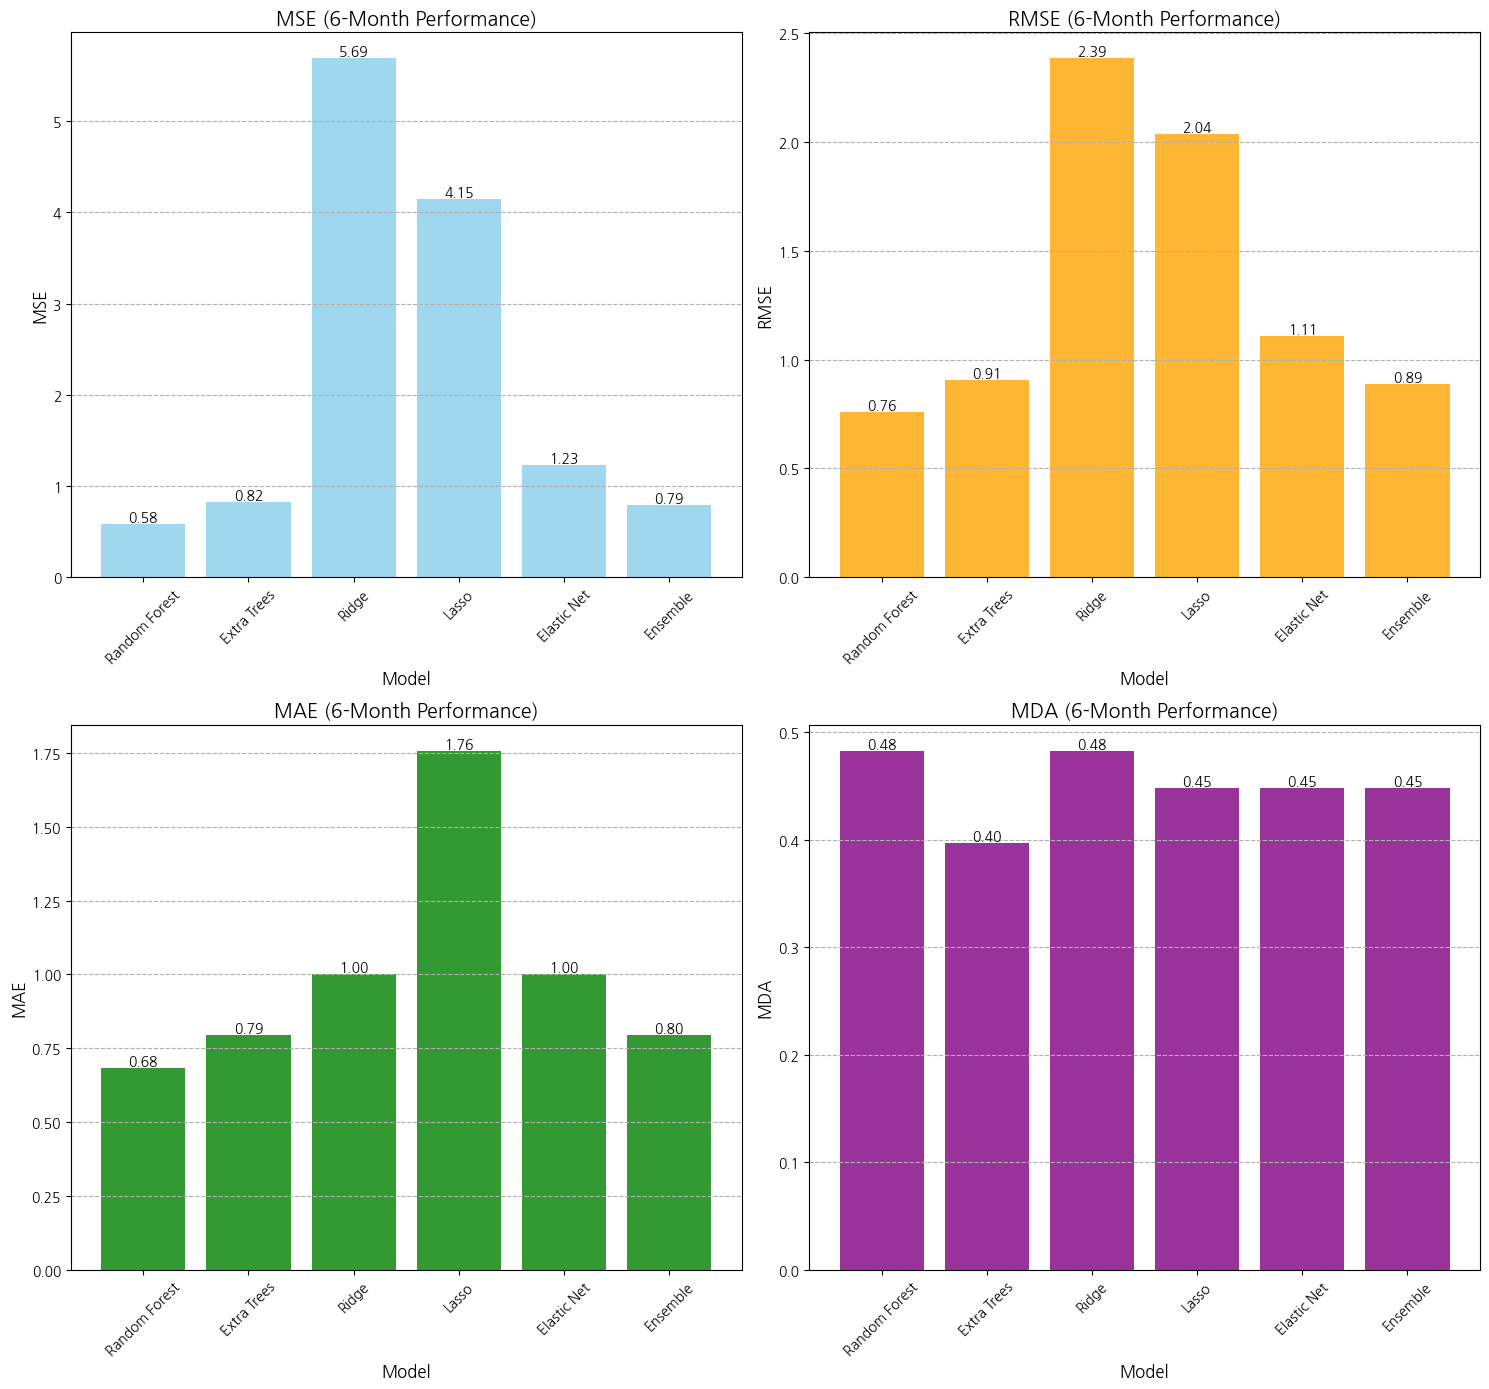

In [ ]:
import matplotlib.pyplot as plt

# 히스토그램 그리기
fig, axes = plt.subplots(2, 2, figsize=(15, 14), sharey=False)  # 2x2 레이아웃
metrics = ['MSE', 'RMSE', 'MAE', 'MDA']  # 성능 지표
colors = ['skyblue', 'orange', 'green', 'purple']  # 색상

for i, metric in enumerate(metrics):
    row, col = divmod(i, 2)  # 행과 열 계산
    bars = axes[row, col].bar(perform_df_6months.columns, perform_df_6months.loc[metric], color=colors[i], alpha=0.8)
    axes[row, col].set_title(f'{metric} (6-Month Performance)', fontsize=14)
    axes[row, col].set_xlabel('Model', fontsize=12)
    axes[row, col].set_ylabel(metric, fontsize=12)
    axes[row, col].grid(axis='y', linestyle='--')
    axes[row, col].tick_params(axis='x', rotation=45)

    # 막대 위에 값 표시
    for bar in bars:
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
                            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

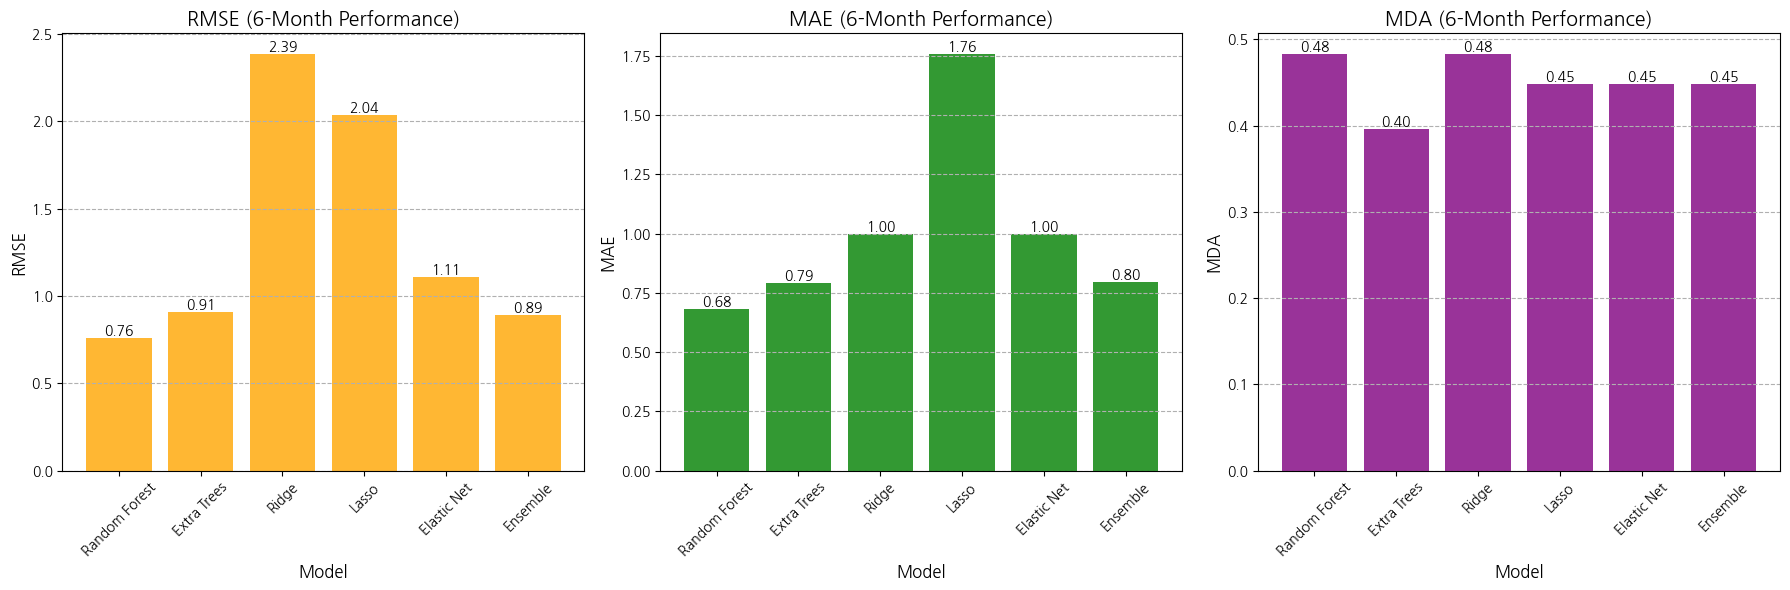

In [ ]:
import matplotlib.pyplot as plt

# 히스토그램 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)  # 1x3 레이아웃
metrics = ['RMSE', 'MAE', 'MDA']  # MSE 제외
colors = ['orange', 'green', 'purple']  # 색상

for i, metric in enumerate(metrics):
    bars = axes[i].bar(perform_df_6months.columns, perform_df_6months.loc[metric], color=colors[i], alpha=0.8)
    axes[i].set_title(f'{metric} (6-Month Performance)', fontsize=14)
    axes[i].set_xlabel('Model', fontsize=12)
    axes[i].set_ylabel(metric, fontsize=12)
    axes[i].grid(axis='y', linestyle='--')
    axes[i].tick_params(axis='x', rotation=45)

    # 막대 위에 값 표시
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
                     ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 목표 변수 = 12개월 인플레이션

In [ ]:
merged_df.columns

Index(['Personal Finance Current', 'Personal Finance Expected',
       'Business Condition 12 Months', 'Business Condition 5 Years',
       'Buying Conditions', 'Current Index', 'Expected Index', 'CPI', 'GSCPI',
       'WTI', '총대출금', '무담보콜금리(1일)', '국고채(1년)', '국고채(10년)', '회사채(3년, AA-)',
       '회사채(3년, BBB-)', '주택담보대출-예금취급기관', '원/미국달러(매매기준율) 평균',
       '원/미국달러(매매기준율) 말일', 'M1(평잔, 원계열)', 'M1(말잔, 원계열)', 'M1(평잔, 계절조정계열)',
       'M1(말잔, 계절조정계열)', '금리 스프레드', '무담보콜금리 차분', '국고채1년 차분', '국고채10년 차분',
       '주택담보대출금리 차분', 'a_htpi', 'a_atpi', 'a_rpi', 'KOSPI', '경제활동인구',
       '경제활동참가율', '실업률', '경제활동참가율d', '실업률d', '전산업생산지수', '경기종합지수(동행지수순환변동치)',
       '제조업평균가동률', '산업별생산지수', '산업별출하지수', '산업별재고지수', '소매판매액지수', '소비자동향조사',
       '경제심리지수', '소비자물가지수', '기대인플레이션율', '관리물가지수', '생산자물가지수', '공급물가지수',
       '수입물가지수', '수입물량지수', '수입금액지수', '순상품교역조건지수', '소득교역조건지수',
       'Inflation_rate'],
      dtype='object')

In [ ]:
# 12개월 예측을 위해 shift
shift_period = 12
merged_df_2 = merged_df.copy()
merged_df_2['Inflation_rate_12m'] = merged_df['Inflation_rate'].shift(-shift_period)

In [ ]:
merged_df_2 = merged_df_2.drop(columns=['Inflation_rate']) # 타깃 학습을 위해 inf drop

In [ ]:
merged_df_2

,Personal Finance Current,Personal Finance Expected,Business Condition 12 Months,Business Condition 5 Years,Buying Conditions,Current Index,Expected Index,CPI,GSCPI,WTI,...,기대인플레이션율,관리물가지수,생산자물가지수,공급물가지수,수입물가지수,수입물량지수,수입금액지수,순상품교역조건지수,소득교역조건지수,Inflation_rate_12m
Date,,,,,,,,,,,,,,,,,,,,,
2007-12-01,98.0,112.0,68.0,81.0,137.0,91.0,65.6,211.445,-0.15,127.349998,...,3.0,93.229615,86.99,86.77,98.73,70.57,86.56,112.71,60.27,4.1
2008-01-01,98.0,116.0,68.0,88.0,146.0,94.4,68.1,212.174,-0.37,124.080002,...,3.2,92.970555,87.48,87.91,101.74,75.60,93.24,111.25,59.89,3.7
2008-02-01,94.0,112.0,54.0,83.0,123.0,83.8,62.4,212.687,0.45,115.459999,...,3.3,93.113425,88.29,89.44,104.50,67.39,84.45,110.11,55.28,4.1
2008-03-01,93.0,112.0,46.0,81.0,124.0,84.2,60.1,213.448,0.15,100.639999,...,3.5,94.002366,89.44,92.77,113.03,74.65,95.78,108.71,64.04,3.9
2008-04-01,86.0,100.0,40.0,71.0,112.0,77.0,53.3,213.942,0.13,67.809998,...,3.4,94.208742,91.34,95.53,117.32,73.41,98.08,106.96,63.28,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,91.0,111.0,79.0,84.0,88.0,69.6,68.8,313.225,-0.56,76.989998,...,3.2,108.286715,119.25,124.77,141.77,109.14,137.14,91.35,108.50,NaN
2024-06-01,81.0,106.0,84.0,88.0,88.0,65.9,69.6,313.049,-0.34,81.540001,...,3.0,108.325721,119.23,124.79,142.64,101.21,126.00,92.09,108.03,NaN
2024-07-01,79.0,105.0,86.0,84.0,81.0,62.7,68.8,313.534,-0.04,77.910004,...,2.9,107.082290,119.56,125.04,143.28,109.55,135.90,93.00,109.93,NaN


In [ ]:
merged_df_2 = merged_df_2.fillna(method='ffill')
merged_df_2 = merged_df_2.dropna()

In [ ]:
merged_df_2.isnull().sum().any()

False

In [ ]:
total_size = len(merged_df_2)
train_size = int(total_size * 0.7)

X_train_12m = merged_df_2.iloc[:train_size].drop(columns=['Inflation_rate_12m'])
y_train_12m = np.log1p(merged_df_2.iloc[:train_size]['Inflation_rate_12m'])

X_test_12m = merged_df_2.iloc[train_size:].drop(columns=['Inflation_rate_12m'])
y_test_12m = np.log1p(merged_df_2.iloc[train_size:]['Inflation_rate_12m'])

scaler = StandardScaler()
X_train_12m_scaled = scaler.fit_transform(X_train_12m)
X_test_12m_scaled = scaler.transform(X_test_12m)

X_train_12m_scaled = pd.DataFrame(X_train_12m_scaled, columns=X_train_12m.columns, index=X_train_12m.index)
X_test_12m_scaled = pd.DataFrame(X_test_12m_scaled, columns=X_test_12m.columns, index=X_test_12m.index)

print(X_train_12m_scaled.head())
print(X_test_12m_scaled.head())

            Personal Finance Current  Personal Finance Expected  \
Date                                                              
2007-12-01                 -0.135792                  -0.539424   
2008-01-01                 -0.135792                  -0.142768   
2008-02-01                 -0.311048                  -0.539424   
2008-03-01                 -0.354861                  -0.539424   
2008-04-01                 -0.661559                  -1.729392   

            Business Condition 12 Months  Business Condition 5 Years  \
Date                                                                   
2007-12-01                     -0.867140                   -0.525625   
2008-01-01                     -0.867140                   -0.043028   
2008-02-01                     -1.426165                   -0.387740   
2008-03-01                     -1.745608                   -0.525625   
2008-04-01                     -1.985190                   -1.215050   

            Buying Condit

In [ ]:
y_test

,Inflation_rate
Date,
2019-09-01,-0.510826
2019-10-01,0.000000
2019-11-01,0.182322
2019-12-01,0.530628
2020-01-01,0.788457
2020-02-01,0.641854
2020-03-01,0.587787
2020-04-01,0.000000
2020-05-01,-0.223144


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

random_state = 42

n_estimators_12m = [10, 20, 30]
max_depth_12m = [10, 12, 15]
min_samples_split_12m = [4, 5, 6]
min_samples_leaf_12m = [4, 5, 6]

hyperparams_12m = {
    'n_estimators': n_estimators_12m,
    'max_depth': max_depth_12m,
    'min_samples_split': min_samples_split_12m,
    'min_samples_leaf': min_samples_leaf_12m
}

rf_grid_12m = GridSearchCV(
    estimator=RandomForestRegressor(random_state=random_state),
    param_grid=hyperparams_12m,
    verbose=True,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

rf_grid_12m.fit(X_train_12m, y_train_12m)

print("Best Parameters:", rf_grid_12m.best_params_)

rf_model_12m = rf_grid_12m.best_estimator_

y_pred_rf_12m = rf_model_12m.predict(X_test_12m)

mse_rf_12m = mean_squared_error(y_test_12m, y_pred_rf_12m)
rmse_rf_12m = np.sqrt(mse_rf_12m)
mae_rf_12m = mean_absolute_error(y_test_12m, y_pred_rf_12m)

print('MSE:', mse_rf_12m)
print('RMSE:', rmse_rf_12m)
print('MAE:', mae_rf_12m)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 10}
MSE: 1.4069565191442488
RMSE: 1.1861519797834714
MAE: 1.1142407523205176


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import numpy as np

random_state = 42

n_estimators_12m = [10, 20, 30]
max_depth_12m = [10, 12, 15]
min_samples_split_12m = [4, 5, 6]
min_samples_leaf_12m = [4, 5, 6]

hyperparams_12m = {
    'n_estimators': n_estimators_12m,
    'max_depth': max_depth_12m,
    'min_samples_split': min_samples_split_12m,
    'min_samples_leaf': min_samples_leaf_12m
}

et_grid_12m = GridSearchCV(
    estimator=ExtraTreesRegressor(random_state=random_state),
    param_grid=hyperparams_12m,
    verbose=True,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

et_grid_12m.fit(X_train_12m, y_train_12m)

print("Best Parameters:", et_grid_12m.best_params_)

et_model_12m = et_grid_12m.best_estimator_

y_pred_et_12m = et_model_12m.predict(X_test_12m)

mse_et_12m = mean_squared_error(y_test_12m, y_pred_et_12m)
rmse_et_12m = np.sqrt(mse_et_12m)
mae_et_12m = mean_absolute_error(y_test_12m, y_pred_et_12m)

print('MSE:', mse_et_12m)
print('RMSE:', rmse_et_12m)
print('MAE:', mae_et_12m)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 20}
MSE: 1.1390636732357504
RMSE: 1.0672692599507168
MAE: 0.9900082514415833


In [ ]:
perform_df_12months = pd.DataFrame({
    'Model': ['Random Forest', 'Extra Trees'],
    'MSE': [mse_rf_12m, mse_et_12m],
    'RMSE': [rmse_rf_12m, rmse_et_12m],
    'MAE': [mae_rf_12m, mae_et_12m]
})

perform_df_12months = perform_df_12months.set_index('Model').T
perform_df_12months

Model,Random Forest,Extra Trees
MSE,1.406957,1.139064
RMSE,1.186152,1.067269
MAE,1.114241,0.990008


### 회귀 모델

In [ ]:
merged_df = merged_df.replace({',': ''}, regex=True).astype(float)
months_shift_12 = merged_df.copy()

# 'inflation_rate' 열을 기준으로 12개월 후 값을 타깃으로 생성
months_shift_12['target'] = merged_df['Inflation_rate'].shift(-12)  # 12개월 후 값
months_shift_12 = months_shift_12.dropna()  # 결측값 제거
months_shift_12

##그레인저##
# 시차 생성 (최대 6개의 시차)
max_lag = 6
variables = months_shift_12.columns.difference(['Inflation_rate', 'target'])

# 각 변수에 대해 그레인저 인과 검정을 수행하여 최적 시차를 찾기
results = {}
p_results = []
for var in variables:
    # Granger 인과관계 검정 수행 (verbose=False로 출력을 최소화)
    test_result = grangercausalitytests(months_shift_12[['target', var]], max_lag, verbose=False)

    # 각 시차의 p-value를 저장
    lag_p_values = [(lag, test[0]['ssr_ftest'][1]) for lag, test in test_result.items()]

    # p-value가 가장 작은 시차 선택
    optimal_lag = min(lag_p_values, key=lambda x: x[1])[0]
    results[var] = (optimal_lag, lag_p_values)

# p-value가 0.05 이하인 결과만 필터링하여 출력
for var, (lag, p_values) in results.items():
    # p-value가 0.05 이하인 시차들만 선택
    significant_lags = [(lag, p_val) for lag, p_val in p_values if p_val <= 0.05]
    if significant_lags:
        p_results.append(var)

merged_granger_12 = months_shift_12.copy()

for var, optimal_lag in results.items():
    # p_result에 포함된 변수명만 대상으로
    if var in p_results and var in merged_granger_12.columns:
        # 최적 시차가 0보다 클 경우에만 shift() 적용
        if optimal_lag[0] > 0:
            merged_granger_12[f'{var}'] = merged_granger_12[var].shift(optimal_lag[0])


common_variables = [var for var in p_results if var in merged_granger_12.columns]

# 겹치는 변수들만 새로운 데이터프레임에 저장
merged_granger_12 = merged_granger_12[common_variables]
merged_granger_12 = pd.merge(merged_granger_12, months_shift_12[['target']], left_index=True, right_index=True, how='inner')
merged_granger_12 = merged_granger_12.fillna(method='bfill')

##train/test##
# 독립 변수(X)와 종속 변수(y) 분리
X = merged_granger_12.drop(columns=['target'])  # 독립 변수
y = merged_granger_12['target']  # 타깃 변수 (6개월 후 인플레이션율)

original_index = X.index
original_columns = X.columns

# 스케일링
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)
y = np.log1p(y)
X = pd.DataFrame(X, index=original_index, columns=original_columns)

total_size = len(X)
train_size = int(total_size * 0.7)

# 학습 데이터 (70%)
X_train_12 = X.iloc[:train_size]
y_train_12 = y.iloc[:train_size]

# 테스트 데이터 (30%)
X_test_12 = X.iloc[train_size:]
y_test_12 = y.iloc[train_size:]

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# 하이퍼파라미터 설정
hyperparams = {
    'max_iter': [1000, 1500, 2000, 2500, 3000],
    'alpha': 1 / np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

lasso_grid = GridSearchCV(
    estimator=Lasso(),
    param_grid=hyperparams,
    verbose=True,
    scoring='neg_root_mean_squared_error',
    cv=kfold,
    # 여기서 객체로 Kfold를 넣어준 것입니다.
    # 원래 내부적으로 KFold가 사용되는데, 이걸 정수로 두면 randomstate를 고정할 수 없어서
    # 성능이 동일하지 않습니다.
    n_jobs=-1
)

lasso_grid.fit(X_train_12, y_train_12)
lasso_model = lasso_grid.best_estimator_

print("Best parameters:", lasso_grid.best_params_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best parameters: {'alpha': 0.0025, 'max_iter': 1000}


In [ ]:
print(y_test_12)
print(y_pred_lasso_12)

Date
2019-01-01    0.788457
2019-02-01    0.641854
2019-03-01    0.587787
2019-04-01    0.000000
2019-05-01   -0.223144
2019-06-01    0.182322
2019-07-01    0.336472
2019-08-01    0.587787
2019-09-01    0.641854
2019-10-01    0.095310
2019-11-01    0.470004
2019-12-01    0.470004
2020-01-01    0.641854
2020-02-01    0.875469
2020-03-01    1.064711
2020-04-01    1.252763
2020-05-01    1.280934
2020-06-01    1.193922
2020-07-01    1.280934
2020-08-01    1.280934
2020-09-01    1.223775
2020-10-01    1.435085
2020-11-01    1.568616
2020-12-01    1.547563
2021-01-01    1.568616
2021-02-01    1.568616
2021-03-01    1.648659
2021-04-01    1.757858
2021-05-01    1.840550
2021-06-01    1.945910
2021-07-01    1.987874
2021-08-01    1.902108
2021-09-01    1.871802
2021-10-01    1.887070
2021-11-01    1.791759
2021-12-01    1.791759
2022-01-01    1.791759
2022-02-01    1.740466
2022-03-01    1.648659
2022-04-01    1.547563
2022-05-01    1.481605
2022-06-01    1.308333
2022-07-01    1.223775
2022-0

NameError: name 'y_pred_lasso_12' is not defined

In [ ]:
print(len(y_test_12))
print(len(y_pred_lasso_12))

In [ ]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
# 테스트 세트에서 성능 평가
y_pred_lasso_12 = lasso_model.predict(X_test_12)

mse_value_ls_12 = mean_squared_error(y_test_12, y_pred_lasso_12)
rmse_value_ls_12 = np.sqrt(mean_squared_error(y_test_12, y_pred_lasso_12))
mae_value_ls_12 = mean_absolute_error(y_test_12, y_pred_lasso_12)
r2_value_ls_12 = r2_score(y_test_12, y_pred_lasso_12)

print("Test set MSE:", mse_value_ls_12)
print("Test set RMSE:", rmse_value_ls_12)
print("Test set MAE:", mae_value_ls_12)
print("Test set R²:", r2_value_ls_12)

In [ ]:
# Ridge 모델
from sklearn.linear_model import Ridge

hyperparams = {'max_iter': [1000, 1500, 2000, 2500, 3000],
               'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

ridge_grid = GridSearchCV(
    estimator=Ridge(),
    param_grid=hyperparams,
    verbose=True,
    scoring='neg_root_mean_squared_error',
    cv=kfold,
    n_jobs=-1
)

ridge_grid.fit(X_train_12, y_train_12)
print(ridge_grid.best_params_)

y_pred_ridge_12 = ridge_grid.predict(X_test_12)

mse_value_rd_12 = mean_squared_error(y_test_12, y_pred_ridge_12)
rmse_value_rd_12 = np.sqrt(mean_squared_error(y_test_12, y_pred_ridge_12))
mae_value_rd_12 = mean_absolute_error(y_test_12, y_pred_ridge_12)
r2_value_rd_12 = r2_score(y_test_12, y_pred_ridge_12)

print("Test set MSE:", mse_value_rd_12)
print("Test set RMSE:", rmse_value_rd_12)
print("Test set MAE:", mae_value_rd_12)
print("Test set R²:", r2_value_rd_12)

In [ ]:
from sklearn.linear_model import ElasticNet

hyperparams = {
    'max_iter': [1000, 1500, 2000, 2500, 3000],
    'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

elastic_net_grid = GridSearchCV(
    estimator=ElasticNet(),
    param_grid=hyperparams,
    verbose=True,
    scoring='neg_root_mean_squared_error',
    cv=kfold,
    n_jobs=-1
)

elastic_net_grid.fit(X_train_12, y_train_12)

print("Best Parameters:", elastic_net_grid.best_params_)

en_model = elastic_net_grid.best_estimator_
y_pred_en_12 = en_model.predict(X_test_12)

# 성능 지표 계산
mse_value_en_12 = mean_squared_error(y_test_12, y_pred_en_12)
rmse_value_en_12 = np.sqrt(mse_value_en_12)
mae_value_en_12 = mean_absolute_error(y_test_12, y_pred_en_12)
r2_value_en_12 = r2_score(y_test_12, y_pred_en_12)

print("MSE:", mse_value_en_12)
print("RMSE:", rmse_value_en_12)
print("MAE:", mae_value_en_12)
print('R^2:', r2_value_en_12)

In [ ]:
perform_df_12months = pd.DataFrame({
    'Model': ['Random Forest', 'Extra Trees','Ridge', 'Lasso', 'Elastic Net'],
    'MSE': [mse_rf_12m, mse_et_12m, mse_value_rd_12, mse_value_ls_12, mse_value_en_12],
    'RMSE': [rmse_rf_12m, rmse_et_12m, rmse_value_rd_12, rmse_value_ls_12, rmse_value_en_12],
    'MAE': [mae_rf_12m, mae_et_12m, mae_value_en_12, mae_value_ls_12, mae_value_en_12]
})

perform_df_12months = perform_df_12months.set_index('Model').T
perform_df_12months

In [ ]:
perform_df_6months

In [ ]:
perform_df

Model,Lasso,Ridge,Elastic Net,Random Forest,Extra Trees,Voting
MSE,0.173675,0.228932,0.286390,0.317353,0.336034,0.121209
RMSE,0.416743,0.478469,0.535154,0.563341,0.579684,0.348150
MAE,0.351365,0.417507,0.494065,0.504522,0.525466,0.278809
MDA,0.600000,0.600000,0.483333,0.466667,0.383333,0.600000


In [ ]:
print(y_train_12m)
print(y_train_12)

Date
2007-12-01    1.629241
2008-01-01    1.547563
2008-02-01    1.629241
2008-03-01    1.589235
2008-04-01    1.526056
                ...   
2019-04-01    0.000000
2019-05-01   -0.223144
2019-06-01    0.182322
2019-07-01    0.336472
2019-08-01    0.587787
Name: Inflation_rate_12m, Length: 141, dtype: float64
Date
2007-12-01    1.629241
2008-01-01    1.547563
2008-02-01    1.629241
2008-03-01    1.589235
2008-04-01    1.526056
                ...   
2018-08-01    0.000000
2018-09-01   -0.510826
2018-10-01    0.000000
2018-11-01    0.182322
2018-12-01    0.530628
Name: target, Length: 133, dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 각 모델의 최적 하이퍼파라미터
rf_best_params_12m = {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 10}
et_best_params_12m = {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 20}
ridge_best_params_12 = {'alpha': 0.1, 'max_iter': 1000}
lasso_best_params_12 = {'alpha': 0.0025, 'max_iter': 1000}
elastic_net_best_params_12 = {'alpha': 0.1, 'l1_ratio': 0.1, 'max_iter': 1000}

# 최적 하이퍼파라미터로 모델 초기화
rf_model_12m = RandomForestRegressor(**rf_best_params_12m)
et_model_12m = ExtraTreesRegressor(**et_best_params_12m)
ridge_model_12 = Ridge(**ridge_best_params_12)
lasso_model_12 = Lasso(**lasso_best_params_12)
elastic_net_model_12 = ElasticNet(**elastic_net_best_params_12)

# 모델 학습
rf_model_12m.fit(X_train_12m, y_train_12m)
et_model_12m.fit(X_train_12m, y_train_12m)
ridge_model_12.fit(X_train_12, y_train_12)
lasso_model_12.fit(X_train_12, y_train_12)
elastic_net_model_12.fit(X_train_12, y_train_12)

# 개별 모델 예측
y_pred_rf_12m = rf_model_12m.predict(X_test_12m)
y_pred_et_12m = et_model_12m.predict(X_test_12m)
y_pred_ridge_12 = ridge_model_12.predict(X_test_12)
y_pred_lasso_12 = lasso_model_12.predict(X_test_12)
y_pred_elastic_net_12 = elastic_net_model_12.predict(X_test_12)

# 예측값 길이 확인 및 최소 길이로 맞춤
min_len = min(len(y_pred_rf_12m), len(y_pred_et_12m), len(y_pred_ridge_12),
              len(y_pred_lasso_12), len(y_pred_elastic_net_12), len(y_test_12m))

# 길이 조정
y_test_12m = y_test_12m[:min_len]
y_pred_rf_12m = y_pred_rf_12m[:min_len]
y_pred_et_12m = y_pred_et_12m[:min_len]
y_pred_ridge_12 = y_pred_ridge_12[:min_len]
y_pred_lasso_12 = y_pred_lasso_12[:min_len]
y_pred_elastic_net_12 = y_pred_elastic_net_12[:min_len]

# 가중치 초기화
best_weights_12m = None
best_mse_12m = float('inf')
best_rmse_12m = float('inf')
best_mae_12m = float('inf')

# RMSE 최소화 가중치 탐색
for weight_rf_12m in np.arange(0.0, 1.1, 0.1):
    for weight_et_12m in np.arange(0.0, 1.1 - weight_rf_12m, 0.1):
        for weight_ridge_12 in np.arange(0.0, 1.1 - weight_rf_12m - weight_et_12m, 0.1):
            for weight_lasso_12 in np.arange(0.0, 1.1 - weight_rf_12m - weight_et_12m - weight_ridge_12, 0.1):
                weight_elastic_net_12 = 1.0 - weight_rf_12m - weight_et_12m - weight_ridge_12 - weight_lasso_12
                if weight_elastic_net_12 < 0.0:
                    continue

                y_pred_weighted_12m = (
                    weight_rf_12m * y_pred_rf_12m +
                    weight_et_12m * y_pred_et_12m +
                    weight_ridge_12 * y_pred_ridge_12 +
                    weight_lasso_12 * y_pred_lasso_12 +
                    weight_elastic_net_12 * y_pred_elastic_net_12
                )

                mse_12m = mean_squared_error(y_test_12m, y_pred_weighted_12m)
                rmse_12m = np.sqrt(mse_12m)
                mae_12m = mean_absolute_error(y_test_12m, y_pred_weighted_12m)

                if rmse_12m < best_rmse_12m:
                    best_weights_12m = [weight_rf_12m, weight_et_12m, weight_ridge_12, weight_lasso_12, weight_elastic_net_12]
                    best_mse_12m = mse_12m
                    best_rmse_12m = rmse_12m
                    best_mae_12m = mae_12m

print("Best Weights (12 months):", best_weights_12m)
print("Best MSE (12 months):", best_mse_12m)
print("Best RMSE (12 months):", best_rmse_12m)
print("Best MAE (12 months):", best_mae_12m)

Best Weights (12 months): [0.0, 0.6000000000000001, 0.0, 0.0, 0.3999999999999999]
Best MSE (12 months): 1.2704769454056681
Best RMSE (12 months): 1.1271543573999385
Best MAE (12 months): 1.0629424963483223


In [ ]:
perform_df_12months = pd.DataFrame({
    'Model': ['Random Forest', 'Extra Trees','Ridge', 'Lasso', 'Elastic Net', 'Voting'],
    'MSE': [mse_rf_12m, mse_et_12m, mse_value_rd_12, mse_value_ls_12, mse_value_en_12, best_mse_12m],
    'RMSE': [rmse_rf_12m, rmse_et_12m, rmse_value_rd_12, rmse_value_ls_12, rmse_value_en_12, best_rmse_12m],
    'MAE': [mae_rf_12m, mae_et_12m, mae_value_en_12, mae_value_ls_12, mae_value_en_12, best_mae_12m]})

perform_df_12months = perform_df_12months.set_index('Model').T
perform_df_12months

Model,Random Forest,Extra Trees,Ridge,Lasso,Elastic Net,Voting
MSE,1.406957,1.139064,7.456306,6.365604,1.358631,1.260220
RMSE,1.186152,1.067269,2.730624,2.523015,1.165603,1.122595
MAE,1.114241,0.990008,1.040027,2.150297,1.040027,1.050511
